# IE531: Algorithms for Data Analytics #
## &copy;  [Professor Ramavarapu "RS" Sreenivas](http://rsree.ise.illinois.edu) ##
### Industrial and Enterprise Systems Engineering, The Grainger College of Engineering,  UIUC ###

<hr style="border:2px solid blue"> </hr>


# Lesson 4: Markov Chains #


Take a look at Review of Probability of Statistics in Lesson 1 before embarking on this lesson. There are some finer points that were glossed over in the introductory material of Lesson 1, which we will address here citing appropriate results from the book (you should consult the text for the proofs of these results, though). 

The "[teliology](https://en.wikipedia.org/wiki/Teleology)" behind Markov Chains (for the purposes of this course, at least) is that oftentimes we will have problems that can be viewed as us taking a random-walk on some graphical-structure. We might be interested in asking statistical-questions about features/properties of these walks (sometimes stated in a probabilistic-sense). In many cases algorithms that answer these questions make extensive use of linear-algebraic properties -- as long as some "extra things" are true.  For example, is it always true that repeated multiplication of the probability-matrix will result in rows that "all look the same" (which also happens to be the Stationary Probability Distribution of the Markov Chain).  This is true only when some "extra things" hold -- we will cover them now. For starters, you can work under the assumption that the Markov Chain has a finite number of states.  You will look at Infinite State Markov Chains as a part of your Homework and Programming Assignments, hopefully. 


## Section 1: <i>Persistence</i> (or <i>Strong Connectedness</i>) and <i>Aperiodicity</i> ##

First, read page 77 of text. The "punchline" is this --
<blockquote>
A Markov-Chain is <i>Persistent</i> if a random-walk starting from a state (and obeying the probabilistic rules dictated by the State-Transition-Matrix) will return to it with probability one. 
</blockquote>
This is the same as requiring that the graphical representation of the Markov Chain is <i>Strongly Connected</i>,that is every state of the Markov Chain is connected to every other state (keep in mind that the edges are directed here; you have to pay attention to the arrows on edges to determine connectivity). This is done in the sample code shown below using [nx.is_strongly_connected](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.is_strongly_connected.html#networkx.algorithms.components.is_strongly_connected) in the function
<blockquote>
<tt>ggenerate_a_random_strongly_connected_directed_graph(dim, do_we_need_to_see_the_graph, do_we_want_aperiodicity)</tt>. </blockquote> 
Now, read the page 77-78 text. The "punchline" is this -- 
<blockquote>
A Markov-Chain is <i>Aperiodic</i> if the Greatest-Common-Divisor (GCD) of closed-path-lengths (in the graphical representation of the Markov Chain) is unity. 
</blockquote>
Why are these two properties important? See code below. The "punchline" is this --
<blockquote>
If you repeatedly multiplied the probability-matrix of a Markov Chain that is <i>Peristent</i> and <i>Aperiodic</i>, then all its rows will start "looking the same," as the matrix-exponent is increased, and each of these identical rows is the <i>Stationary Probability Distribution</i> of the Markov Chain. 
</blockquote>
If the Markov Chain is Persistent, but not Aperiodic, then repeated-multiplication of the probability matrix will not result in all rows (of the exponent) "looking the same" -- this product will cycle-between different values (see sample code below for additional details).  You have to take the average of these to get at the Stationary Probability Distribution of the Markov Chain.  

If the Markov Chain is connected, but not strongly connected, then a random walk from a state will evenutally result with a visit to (states in) a maximal strongly connected component. Once walk enters the strongly connected component, it will stay in there for ever.  We then use the above observations accordingly. There is a way to combine these average distributions to get at the global distribution, but this will depend on where the random walk starts (i.e. it depends on the intial state).  This commonsense approach when stated formally can get a little hairy. I am skipping it for the present. 
***

In [1]:
# Persistence and Aperiodicity Demonstration
#
# IE531: Algorithms for Data Analytics
# Prof. R.S. Sreenivas
#

import random
import numpy as np 
import math
import matplotlib.pyplot as plt
import networkx as nx

# defining an variable to stop iterations
ERROR = 1.0e-6

# need this to keep the matrix print statements to 4 decimal places
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})

In [2]:
# Computing the GCD of a list of numbers 
# from https://stackoverflow.com/questions/29194588/python-gcd-for-list
from math import gcd
from functools import reduce
def find_gcd(list):
    x = reduce(gcd, list)
    return x

In [3]:
# check for aperiodicity, by checking if the gcd(loop-lengths) = 1
def check_for_aperiodicity(list) :
    if (find_gcd(list) == 1) :
        return True
    else :
        return False

In [4]:
def generate_a_random_strongly_connected_directed_graph(dim, do_we_need_to_see_the_graph, do_we_want_aperiodicity) :
    # we create an Erdos-Renyi Random Graph 
    # https://en.wikipedia.org/wiki/Erdős–Rényi_model
    # we need the edge-probability to be around ln(n)/n for strong connectedness
    
    # https://networkx.github.io/documentation/latest/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html#networkx.generators.random_graphs.erdos_renyi_graph
    #er = nx.erdos_renyi_graph(dim, 1.5*math.log(dim)/dim, directed=True)
    # https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.components.strongly_connected.is_strongly_connected.html
    #while (not nx.is_strongly_connected(er)) :
    #    er = nx.erdos_renyi_graph(dim, 1.5*math.log(dim)/dim, directed=True)
    # This is just to generate connected directed graphs -- which we modified to create connected directed graphs
    # that are also aperiodic... the code below should be self-explanatory 
        
    er = nx.erdos_renyi_graph(dim, 1.5*math.log(dim)/dim, directed=True)
    # printing the cycle-basis (i.e. all the simple-cylces in the digraph)
    list_of_simple_cycles = list(nx.simple_cycles(er))
    list_of_loop_lengths = []
    for i in range(len(list_of_simple_cycles)) :
        list_of_loop_lengths.append(len(list_of_simple_cycles[i]))
        
    # if we want (resp. do not want) aperiodicity then the while-loop below should (resp. should-not) terminate
    # when the random graph is connected and aperiodic (resp. not aperiodic)
    
    if (not do_we_want_aperiodicity) :
        while ((not nx.is_strongly_connected(er)) or (check_for_aperiodicity(list_of_loop_lengths))) :
            er = nx.erdos_renyi_graph(dim, 1.5*math.log(dim)/dim, directed=True)
            list_of_simple_cycles = list(nx.simple_cycles(er))
            list_of_loop_lengths = []
            for i in range(len(list_of_simple_cycles)) :
                list_of_loop_lengths.append(len(list_of_simple_cycles[i]))
    else :
        while ((not nx.is_strongly_connected(er)) and (not check_for_aperiodicity(list_of_loop_lengths))) :
            er = nx.erdos_renyi_graph(dim, 1.5*math.log(dim)/dim, directed=True)
            list_of_simple_cycles = list(nx.simple_cycles(er))
            list_of_loop_lengths = []
            for i in range(len(list_of_simple_cycles)) :
                list_of_loop_lengths.append(len(list_of_simple_cycles[i])) 
        
    # draw the strongly connected digraph
    # https://networkx.github.io/documentation/latest/reference/drawing.html#module-networkx.drawing.nx_pylab
    if (do_we_need_to_see_the_graph) :
        print ('Plot of the Randomly Generated trongly-Connected Digraph (edges with double-arrows are loops, FYI)')
        nx.draw(er, with_labels=True, font_weight='bold')
        plt.show()
        
    # printing the cycle-basis (i.e. all the simple-cylces in the digraph)
    list_of_simple_cycles = list(nx.simple_cycles(er))
    list_of_loop_lengths = []
    for i in range(len(list_of_simple_cycles)) :
        list_of_loop_lengths.append(len(list_of_simple_cycles[i]))
        
    print ("The Directed Graph shown below has " + str(len(list_of_simple_cycles)) + " Simple Cycles:")

    for i in range(len(list_of_simple_cycles)) :
        print (list_of_simple_cycles[i])
    print ('The GCD of loop-lengths is: ' + str(find_gcd(list_of_loop_lengths)))
        
    if (check_for_aperiodicity(list_of_loop_lengths)):
        print ("The Adjacency Graph of the Markov Chain is Aperiodic")
    else:
        print ("The Adjacency Graph of the Markov Chain is not Aperiodic")
    
    # get the adjacency matrix of this strongly connected digraph
    #A = nx.to_numpy_matrix(er) <-- https://stackoverflow.com/questions/75284417/attributeerror-module-networkx-has-no-attribute-from-numpy-matrix
    A = nx.to_numpy_array(er)
    # this has type <class 'numpy.matrixlib.defmatrix.matrix'>
    # we need to convert it to <class 'numpy.ndarray'> for it to work with the MCMC-MH implementation of mine
    # go this from -- https://stackoverflow.com/questions/3337301/numpy-matrix-to-array
    A = np.squeeze(np.asarray(A)) 
    return A

In [5]:
# Repeated Squaring Algorithm for matrix exponentiation 
def repeated_squaring(A, exponent) :
    if (exponent == 1) :
        return A
    else :
        if (exponent%2 == 1) :
            return (np.matmul(A, repeated_squaring(np.matmul(A,A), int((exponent-1)/2))))
        else :
            return (np.matrix(repeated_squaring(np.matmul(A,A), int(exponent/2))))

Plot of the Randomly Generated trongly-Connected Digraph (edges with double-arrows are loops, FYI)


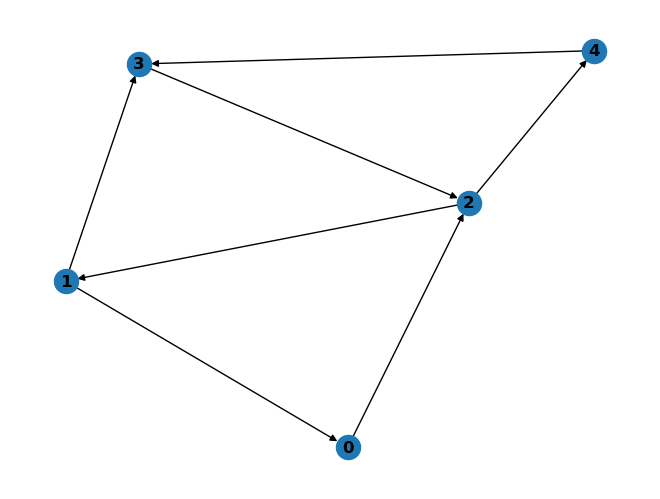

The Directed Graph shown below has 3 Simple Cycles:
[0, 2, 1]
[1, 3, 2]
[2, 4, 3]
The GCD of loop-lengths is: 3
The Adjacency Graph of the Markov Chain is not Aperiodic
bunga [[0.0000 0.0000 1.0000 0.0000 0.0000]
 [1.0000 0.0000 0.0000 1.0000 0.0000]
 [0.0000 1.0000 0.0000 0.0000 1.0000]
 [0.0000 0.0000 1.0000 0.0000 0.0000]
 [0.0000 0.0000 0.0000 1.0000 0.0000]]

Probability Matrix: 
[[0.0000 0.0000 1.0000 0.0000 0.0000]
 [0.5000 0.0000 0.0000 0.5000 0.0000]
 [0.0000 0.5000 0.0000 0.0000 0.5000]
 [0.0000 0.0000 1.0000 0.0000 0.0000]
 [0.0000 0.0000 0.0000 1.0000 0.0000]]


In [6]:
dim = 5
adjacency1 = generate_a_random_strongly_connected_directed_graph(dim, True, False)

row_sum = np.matrix(adjacency1)*np.ones((dim,1))
print ("bunga", adjacency1)
p = np.zeros((dim, dim))
for i in range(dim) :
    for j in range(dim) :
        p[i][j] = adjacency1[i][j]/row_sum[i]

print ("\nProbability Matrix: ")
print (p)    

***
Computing the <i>Stationary Probability Distribution</i> of this <i>Connected-But-Not-Aperiodic</i> Markov Chain
using the method described in the proof of Theorem 4.2 in page 81 of the book.
![Fig-0](Figures/theorem4.2.png)
***

In [7]:
# https://stackoverflow.com/questions/8486294/how-to-add-an-extra-column-to-a-numpy-array
A = np.matrix(p) - np.identity(dim)
B = np.ones((dim, dim+1))
B[:,:-1] = A
B = np.delete(B,0,1)
#print(B)

inverse = np.linalg.inv(B)
blah = np.zeros(dim)
blah[dim-1] = 1
stationary_probability_distribution = np.matrix(blah)*np.matrix(inverse)
print ("The Stationary Probability Distribution of the Markov Chain show above is:")
print (stationary_probability_distribution)
print ("Is (Stationary Probability Distribution) x Probability-Matrix = (Stationary Probability Distribution)? ", np.allclose(np.matrix(stationary_probability_distribution) * np.matrix(p), stationary_probability_distribution))

exponent = 1000
print ("\nWe know the Markov Chain described by the Probabilty Matrix above is Persistent-but-not-Aperiodic")
print ("Let's see what we get when the Probability-Matrix is raised to an exponent of " + str(exponent))
print (repeated_squaring(p, exponent))
print ("The rows of the above matrix do not look the same, as expected!")

The Stationary Probability Distribution of the Markov Chain show above is:
[[0.0833 0.1667 0.3333 0.2500 0.1667]]
Is (Stationary Probability Distribution) x Probability-Matrix = (Stationary Probability Distribution)?  True

We know the Markov Chain described by the Probabilty Matrix above is Persistent-but-not-Aperiodic
Let's see what we get when the Probability-Matrix is raised to an exponent of 1000
[[0.0000 0.0000 1.0000 0.0000 0.0000]
 [0.2500 0.0000 0.0000 0.7500 0.0000]
 [0.0000 0.5000 0.0000 0.0000 0.5000]
 [0.0000 0.0000 1.0000 0.0000 0.0000]
 [0.2500 0.0000 0.0000 0.7500 0.0000]]
The rows of the above matrix do not look the same, as expected!


In [8]:
print ("\nSince the Markov Chain is not Aperiodic, we have to compute the average-value as suggested by the textbook")
C = (1/exponent)*p
for i in range(exponent) :
    C = C + ((1/exponent)*repeated_squaring(p,i+1))
print(C)
print ("\nNow, the rows of this average-value looks a little more like the stationary-distribution")
print (stationary_probability_distribution)


Since the Markov Chain is not Aperiodic, we have to compute the average-value as suggested by the textbook
[[0.0833 0.1665 0.3350 0.2498 0.1665]
 [0.0843 0.1665 0.3330 0.2508 0.1665]
 [0.0833 0.1675 0.3330 0.2498 0.1675]
 [0.0833 0.1665 0.3350 0.2498 0.1665]
 [0.0833 0.1665 0.3330 0.2518 0.1665]]

Now, the rows of this average-value looks a little more like the stationary-distribution
[[0.0833 0.1667 0.3333 0.2500 0.1667]]


***
If the Markov Chain is Persistent and Aperiodic, there is no need to compute the average (as with the example above). We just raise the probability matrix to a large-enough exponent, and pretty much all the rows of the result should look the same.  See below for a verification. 
***

Plot of the Randomly Generated trongly-Connected Digraph (edges with double-arrows are loops, FYI)


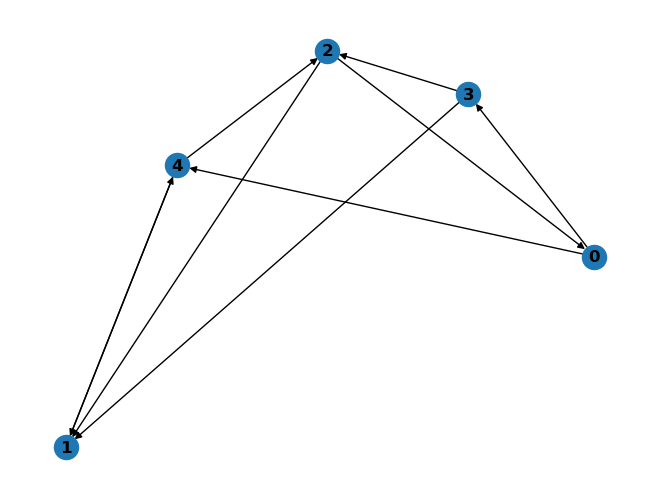

The Directed Graph shown below has 5 Simple Cycles:
[0, 4, 2]
[0, 3, 2]
[0, 3, 1, 4, 2]
[1, 4, 2]
[1, 4]
The GCD of loop-lengths is: 1
The Adjacency Graph of the Markov Chain is Aperiodic

Probability Matrix: 
[[0.0000 0.0000 0.0000 0.5000 0.5000]
 [0.0000 0.0000 0.0000 0.0000 1.0000]
 [0.5000 0.5000 0.0000 0.0000 0.0000]
 [0.0000 0.5000 0.5000 0.0000 0.0000]
 [0.0000 0.5000 0.5000 0.0000 0.0000]]
The Stationary Probability Distribution of the Markov Chain show above is:
[[0.1000 0.3000 0.2000 0.0500 0.3500]]
Is (Stationary Probability Distribution) x Probability-Matrix = (Stationary Probability Distribution)?  True

We know the Markov Chain described by the Probabilty Matrix above is Persistent-and-Aperiodic
Let's see what we get when the Probability-Matrix is raised to an exponent of 1000
[[0.1000 0.3000 0.2000 0.0500 0.3500]
 [0.1000 0.3000 0.2000 0.0500 0.3500]
 [0.1000 0.3000 0.2000 0.0500 0.3500]
 [0.1000 0.3000 0.2000 0.0500 0.3500]
 [0.1000 0.3000 0.2000 0.0500 0.3500]]
The row

In [9]:
dim = 5
adjacency1 = generate_a_random_strongly_connected_directed_graph(dim, True, True)

row_sum = np.matrix(adjacency1)*np.ones((dim,1))

p = np.zeros((dim, dim))
for i in range(dim) :
    for j in range(dim) :
        p[i][j] = adjacency1[i][j]/row_sum[i]

print ("\nProbability Matrix: ")
print (p)   

# https://stackoverflow.com/questions/8486294/how-to-add-an-extra-column-to-a-numpy-array
A = np.matrix(p) - np.identity(dim)
B = np.ones((dim, dim+1))
B[:,:-1] = A
B = np.delete(B,0,1)

inverse = np.linalg.inv(B)
blah = np.zeros(dim)
blah[dim-1] = 1
stationary_probability_distribution = np.matrix(blah)*np.matrix(inverse)
print ("The Stationary Probability Distribution of the Markov Chain show above is:")
print (stationary_probability_distribution)
print ("Is (Stationary Probability Distribution) x Probability-Matrix = (Stationary Probability Distribution)? ", np.allclose(np.matrix(stationary_probability_distribution) * np.matrix(p), stationary_probability_distribution))

exponent = 1000
print ("\nWe know the Markov Chain described by the Probabilty Matrix above is Persistent-and-Aperiodic")
print ("Let's see what we get when the Probability-Matrix is raised to an exponent of " + str(exponent))
print (repeated_squaring(p, exponent))
print ("The rows of the above matrix do look the same, and is close to the Stationary Probability Distribution, as expected!")

***
We have used some of the results below in the code above.  But here is what you need to know/understand.  Refer to the text for the formal proofs -- it is not important you regurgitate them, but you need to have a rough-idea of the stream of reasoning behind each proof.  You can always refer to the text for the nitty-gritty details. 

<ol>
<li><b>Lemma 4.1</b>: If <b>P</b> is the <i>n x n</i> probability matrix of a connected Markov Chain, then the <i>n x (n+1)</i> matrix [<b>P</b>-<b>I</b>, 1], where [1] is the vector of ones, is a matrix of rank <i>n</i>. This means we can remove one column of [<b>P</b>-<b>I</b>, 1] and get an <i>n x n</i> matrix of rank 1 (i.e. we can invert it, when needed).</li>

<li><b>Theorem 4.2 (Fundamental Theorem of Markov Chains)</b>: If <b>P</b> is the <i>n x n</i> probability matrix of a connected Markov Chain, then there is a unqiue (row) probability vector <b>π</b> such that (1) <b>πP</b> = <b>π</b>, and (2) the average visit ratio of a random walk on the Markov chain is <b>π</b>.</li>

<li><b>Lemma 4.3</b>: If <b>P</b> is the <i>n x n</i> probability matrix of a strongly-connected (i.e. Persistent) Markov Chain, and the (row) probability vector <b>π</b> (i.e. all items in <b>π</b> add to 1) satisfies the <b>π</b><sub>i</sub><b>P</b><sub>i,j</sub> = <b>π</b><sub>j</sub><b>P</b><sub>j,i</sub>, for all possible choices of <i>i, j</i>, then <b>π</b> is the Stationary Probability Distribution of the Markov Chain.</li>
</ol>
***

If you were to use <i>Markov Chains</i> for some practical application, you must pay specific attention to the question -- <i>Where does the State-Transition-Matrix of a Markov Chain Come from?</i> This important topic is addressed in this lesson, as well. 

## Section 2: Empirical Methods for Generating the State-Transition-Matrix ##

Under this scheme we have some "training data" that we use to extract the State-Transition-Matrix from.   This example 
has been used by many, and you can find a lot on the web on different ways of accomplishing what I have done. 

As of today, the [Gutenberg Project](http://www.gutenberg.org) contains 54,470 free e-books that you can download. I picked the text-version of [Herman Hesse's](https://en.wikipedia.org/wiki/Hermann_Hesse) novel [Siddhartha](http://www.gutenberg.org/cache/epub/2500/pg2500.txt). Using a standard text-editor I deleted all of the boiler-plate text that describes the Gutenberg Project, and converted all characters to lower-case.   

### Section 2.1: Word-based Data Analytics ###

We build an empirical distribution of what the next word should be for each word in the training text.  That is, for each word in the text, we will keep track of all possible choices for the next-word (with repetitions, when ever they occur) in a Python-dictionary.  We start from a randomly chosen word as the starting <i>key</i>.  We pick uniformly at random one of the words that followed the key in the original text.  This newly picked word becomes the key, and the process repeats till we have generated sufficient text.  There is no need to clean up the resulting text, as all 
words are legitimate words. You can look at Python code shown below, we have effectively built a Markov Chain that determines what the next word should be based on the previous word.  The generated text is a list of words that is a random-walk on this Markov Chain.  

In [10]:
# Markov-Chain Based Text Generator 
#
# IE531: Algorithms for Data Analytics
# Prof. R.S. Sreenivas
#
# https://blog.upperlinecode.com/making-a-markov-chain-poem-generator-in-python-4903d0586957
# I found this on the web where a text-file is read, firt. Following this, for each word in 
# the text-file as key, a Python-Dictionary of words-that-immediately-followed-the-key was 
# constructed.  We start from a random-initial-key and pick (at random) the next-word from 
# the dictionary (using the first-word as key).  This process repeats till sufficient words 
# of text have been generated.
#

import random

# have to remove multiple occurrences of spaces etc in the training text 
# https://stackoverflow.com/questions/1157106/remove-all-occurrences-of-a-value-from-a-list
def remove_values_from_list(the_list, val):
   return [value for value in the_list if value != val]

# form a single string that contains the entire novel as training data... I got an error
# when I did this for the first-time, and Google told me to put the "encoding" part -- 
# and it worked fine afterwards
INPUT_FILENAME = 'Data/Siddhartha_Herman_Hesse'
training_text = open(INPUT_FILENAME, "r", encoding = "ISO-8859-1").read()

# split the string into its constituent words (got this part from the web)
training_text = ''.join([i for i in training_text if not i.isdigit()]).replace("\n", " ").split(' ')
# This process the list of poems. Double line breaks separate poems, so they are removed.
# Splitting along spaces creates a list of all words.

# remove blank-spaces 
training_text = remove_values_from_list(training_text, '')
training_text = remove_values_from_list(training_text, ' ')

# the length of the generated text 
generated_text_length = 200 
index = 1
chain = {}

# This loop creates a dicitonary called "chain". Each key is a word, and the value of each key
# is an array of the words that immediately followed it.
for word in training_text[index:] : 
    key = training_text[index - 1]
    if key in chain :
        chain[key].append(word)
    else:
        chain[key] = [word]
    index += 1

#random first word
word1 = random.choice(list(chain.keys())) 
message = word1.capitalize()

# Picks the next word over and over until word count achieved
while len(message.split(' ')) < generated_text_length:
    word2 = random.choice(chain[word1])
    word1 = word2
    message += ' ' + word2

OUTPUT_FILENAME = 'Data/output.txt'
# creates new file with output and prints it to the terminal
with open(OUTPUT_FILENAME, "w") as file:
    file.write(message)
output = open(OUTPUT_FILENAME,"r")
print(output.read())

Striving for a younger one how good as one i'd want to the sinner is just as most of age and let his mother and govinda slowly lose himself by something cooked. he after all just as a long time she said the voice the samanas to the service of what i'll be godly i do many hours he was intertwined and in being slightly higher level for the two friendly eyes and since it was shining in every caress every day and used to be too will not also do not wish to forget him. once before he demanded him the glow of suffering on his heart then the boat was he smiled and have you going into the pain for joy. had become entities and fell silent and the young with his self would have been born before his own search for oneself and grew while begging with impatience he felt like an upcoming harvest or might be food to get old samanas and of day follow him for his friend "govinda my present life in her eyes saw at which one of it when he was listening to go. he had no taste of suffering and washing


***
For the next step, we build a Markov Chain using pairs of words that appeared together in the text.  Using a similar method as before we determine what the next word should be using the two-previous words in the generated text.   The generated text is a random-walk over a Markov Chain that is different from the previous one.  The text that is generated by this process is a little more <i>"Herman Hess Like"</i> -- and resuting output is shown below. 
***

In [11]:
# the length of the generated text 
generated_text_length = 200 
index = 1
chain = {}

# This loop creates a dicitonary called "chain". Each key is 2-tuples ofword, and the value of each key
# is an array of the words that immediately followed it.
for word in training_text[index:] : 
    key = ','.join((training_text[index - 2], training_text[index - 1]))
    if key in chain :
        chain[key].append(word)
    else:
        chain[key] = [word]
    index += 1

selected_key = random.choice(list(chain.keys()))
selected_key = [x.strip() for x in selected_key.split(',')]
word1 = selected_key[0]
word2 = selected_key[1] 
message = word1.capitalize()
message += ' ' + word2
selected_key = ','.join((word1, word2))

# Picks the next word over and over until word count achieved
while len(message.split(' ')) < generated_text_length:
    word2 = random.choice(chain[selected_key])
    selected_key = [x.strip() for x in selected_key.split(',')]
    word1 = selected_key[1]  
    if (('.' in word1) or ('!' in word1) or ('?' in word1)):
        message += ' ' + word2.capitalize()
    else :
        message += ' ' + word2
    selected_key = ','.join((word1, word2))

OUTPUT_FILENAME = 'Data/output1.txt'
# creates new file with output and prints it to the terminal
with open(OUTPUT_FILENAME, "w") as file:
    file.write(message)
output = open(OUTPUT_FILENAME,"r")
print(output.read())

Also remembered everything he saw. And it is hard it is true that he loved siddhartha's eye and sweet voice he loved him still this faithful man this buddha was awaiting his death where the huge event was to be holy? What remains? What can stand the test? And he felt that he himself had almost reached the large city. Then he saw her face smiling full of yearning and the exercises required. Occasionally the two young men with good and yet the bird as it has come to learn from teachings and without making a sound. Contently he did not imitate breathed softly in an ornamental sedan-chair sat a woman and was nevertheless always there was something about this strange foolish or silly is contained in them. But the wound still burned longingly and bitterly siddhartha thought a single drop of sweetness from your father's hut and from that long good sleep which has existence? Isn't it just like you. I'm seeing that you're siddhartha? It's you and me to be penetrated and destroyed by thought sin

***
For the final step, we build a Markov Chain using 3-tuples of words that appeared together in the text.  Using a similar method as before we determine what the next word should be using the three-previous words in the generated text.   The generated text is a random-walk over a Markov Chain that is different from the previous one.  The text that is generated by this process is shown beneath the code sample shown below. This practically is a (random) cut and paste of the original text (and this is to be expected -- why?)
***

In [12]:
# the length of the generated text 
generated_text_length = 200 
index = 1
chain = {}

# This loop creates a dicitonary called "chain". Each key is 3-tuples ofword, and the value of each key
# is an array of the words that immediately followed it.
for word in training_text[index:] : 
    key = ','.join((training_text[index - 3], training_text[index - 2], training_text[index - 1]))
    if key in chain :
        chain[key].append(word)
    else:
        chain[key] = [word]
    index += 1

selected_key = random.choice(list(chain.keys()))
selected_key = [x.strip() for x in selected_key.split(',')]
word1 = selected_key[0]
word2 = selected_key[1] 
word3 = selected_key[2] 
message = word1.capitalize()
message += ' ' + word2 + ' ' + word3
selected_key = ','.join((word1, word2, word3))

# Picks the next word over and over until word count achieved
while len(message.split(' ')) < generated_text_length:
    word3 = random.choice(chain[selected_key])
    selected_key = [x.strip() for x in selected_key.split(',')]
    word2 = selected_key[2]
    word1 = selected_key[1]
    if (('.' in word2) or ('!' in word2) or ('?' in word2)):
        message += ' ' + word3.capitalize()
    else :
        message += ' ' + word3
    selected_key = ','.join((word1, word2, word3))

OUTPUT_FILENAME = 'Data/output2.txt'
# creates new file with output and prints it to the terminal
with open(OUTPUT_FILENAME, "w") as file:
    file.write(message)
output = open(OUTPUT_FILENAME,"r")
print(output.read())

He had left him had to part with him was not able to accept his teachings. Slower he walked along in his thoughts and asked himself: "but what is this what you have sought to learn from teachings and from teachers and what they who have taught you much were still unable to accept his teachings. Slower he walked along in his thoughts his calm face was neither happy nor sad it seemed to him as the moon. However easily he succeeded in talking to all of them my river has been nothing but a listener completely concentrated on listening completely empty he felt that in this grove his past life also stayed behind and parted from him. He pondered about this sensation which filled him completely as he was alien to them. Years passed by and nobody counted them. Then at one time came without clothes with dusty feet to me into the garden. You are much more like him than you were like him at that time the great distinction which set him apart from the childlike people. But now since his son was her

***
### Section 2.2: Theoretical Approaches to obtaining the State-Transition-Matrix: Case Study from Finance ###

This section is essentially my notes on [Dr. Brunick's slides on Arbitrage](References/Brunick.pdf). It is best if you viewed it first, or watched my flipped-classroom video on this material, before you read this section.

In Brunick's slides you may think of a bet (or a payoff) as a piece of paper that looks like those shown below
![Fig-1](Figures/bets.pdf)
The bet that is recorded in figure (c) is an [Even Money Bet](\href{https://en.wikipedia.org/wiki/Even_money) bet -- that is, the Bookie has taken a bet from a customer who will pay (resp. will be paid) <i>x</i> \\$'s if Kansas-State wins (resp. if Butler wins). The bets of figure (a) and (b) are when <i>x</i> = 1\\$, and 
<i>x</i> = -1\\$ respectively.  The bet of figure (d) is not an even-money bet; this customer is asking to be paid 4\\$ (resp. 2\\$) if Butler (resp. Kansas-State) wins. 

The first observation you should make is that the no arbitrage price of any even-money bet is zero. To see this, let us suppose the bet shown in figure (a) has a price of <i>p<sub>1</sub></i>, and that of (b) has a price of <i>p<sub>2</sub></i>.  Any customer that has bought both these bets would have paid <i>p<sub>1</sub> + p<sub>2</sub></i>, and has a net-zero payoff.  Assuming nobody is a fool to pay a non-zero amount for a zero-payoff, we must conclude that <i>p<sub>1</sub> + p<sub>2</sub> = 0</i> (or, <i>p<sub>1</sub> = -p<sub>2</sub></i>).  Since no Bookie will pay anybody to place a bet (which is what a negative-price would mean), it must be that <i>p<sub>1</sub> = p<sub>2</sub> = 0</i>.  

Consider a generic bet which pays $a$\\$ if Butler wins, and $b$\\$ if Kansas State wins.  The bet shown in figure (d) 
is a special case when $a = 4$ and $b = 2$, for example.   Assuming this bet can be <i>replicated</i>, this payoff can be equivalently represented by a cash-position and (multiple units of) a zero-valued bet like the one shown in figure (a) (or, figure (b); keep in mind that we do not need both -- as one of them is the opposite of the other).  This tantamount to asking for a solution to the equation
$$
\left(
\begin{array}{c}
a\\ b 
\end{array}
\right) = x_1 + x_2 \times \underbrace{\left(
\begin{array}{r}
1\\ -1
\end{array}
\right)}_{\mbox{cf. figure (a)}} = \underbrace{\left(
\begin{array}{rr}
1 & 1\\ 1 & -1
\end{array}
\right)}_{\mbox{rank = 2}} \left(
\begin{array}{c}
x_1\\ x_2
\end{array}
\right) \Rightarrow \left(
\begin{array}{c}
x_1\\ x_2
\end{array}
\right) = \left(
\begin{array}{c}
\frac{a+b}{2}\\ \frac{a-b}{2}
\end{array}
\right)
$$
This means this bet has a no-arbitrage value of $\frac{a+b}{2}$ -- which is what the Bookie should charge the customer. 
Notice that the exact-probability of Butler winning (or Kansas-State winning) does not enter into the picture.  Alternately, 
just as with the Bookie, who after looking at \\$$s$ (resp. \\$$y$) being bet on $E$ (resp. $\neg E$), used the <i>Expected Martingale Measure</i> (EMM) of  
$$
p(E) = \frac{x}{x+y},
$$
we can says Brunick's bookie has used the EMM (i.e. "fake" probability; but needed to find the correct no-arbitrage price) of $\frac{1}{2}$ for Butler (or Kansas-State) winning. We are not estimating the true-probability of Butler or Kansas-State winning -- this is something that is impossible to do! It is not hard to see that with this formula, all even-money bets have a zero no-arbitrage price (we argued it differently, earlier).   We could have arrived at the no-arbitrage price by using this EMM -- that is, 
$\frac{1}{2}a + \frac{1}{2}b = \frac{a+b}{2}$.   

Just to complete the picture -- if someone is willing to pay $\frac{a+b}{2} + \alpha$ for this payoff, where $\alpha > 0$. Then you sell this payoff to them for $\frac{a+b}{2} + \alpha$ (i.e. you are the Bookie for that person), and then place an even-money bet of $\frac{a-b}{2}$ on Butler.   After the Butler vs. Kansas State game, you have to honor the bet you sold.  Your payoff will be 
$$
\underbrace{\left(\begin{array}{c}
\frac{a+b}{2} + \alpha\\ \frac{a+b}{2} + \alpha
\end{array}\right)}_{\mbox{cash-position}} - \underbrace{\left(\begin{array}{c}
a\\ b
\end{array}\right)}_{\mbox{customer's payoff}} + \underbrace{\left(\begin{array}{c}
\frac{a-b}{2} \\ -\frac{a-b}{2} 
\end{array}\right)}_{\mbox{even-money bet on Butler}} = \left(\begin{array}{c}
\alpha\\ \alpha
\end{array}\right) 
$$
You pocket \\$$\alpha > 0$, and keep doing the above till there are no customers that are willing to pay more than 
$\frac{a+b}{2}$ for the above payoff. 

If someone thinks the price of the payoff is $\frac{a+b}{2} - \alpha$, where $\alpha > 0$.  You borrow $\frac{a+b}{2} - \alpha$ from a friend who does not charge you interest (after all, the game lasts just for a few hours!), purchase the payoff from this person.  You then place an even-money bet of $\frac{a-b}{2}$ on Kansas State.  After the game, your payoff will be
$$
\underbrace{\left(\begin{array}{c}
-\frac{a-b}{2} \\ \frac{a-b}{2} 
\end{array}\right)}_{\mbox{even-money bet on K-State}} + 
\underbrace{\left(\begin{array}{c}
a\\ b
\end{array}\right)}_{\mbox{your payoff}} - 
\underbrace{\left(\begin{array}{c}
\frac{a+b}{2} -\alpha\\ \frac{a+b}{2} - \alpha
\end{array}\right)}_{\mbox{your debt}} = \left(\begin{array}{c}
\alpha\\ \alpha
\end{array}\right) 
$$
You pocket \\$$\alpha > 0$, and keep doing the above till there are no customers that are willing to sell the payoff for less than 
$\frac{a+b}{2}$.   

<hr style="border:2px solid red"> </hr>

It is clear that the payoff described above has a no-arbitrage price of $\frac{a+b}{2}$.  Usually, we do not construct the arbitrage generating portfolio like we did for when the payoff is over- and under-priced.  It is easy to do for simple cases, but it might not be easy in the most general of cases.  The teleology that we work under is this -- if something is not trading at its no-arbitrage price, then there is a way in which you can always make risk-free money.  This does not mean that arbitrage-opportunities are never present -- in fact, they will be there for a short-lived
period of time -- it is our "job" to grab these fleeting-opportunities and "restore" things back to their no-arbitrage price. 

"Nature enfores the Laws of Physics," but we (the "Market") "enforce the Laws of Finance."  This is the main driver behind Finance.  

<hr style="border:2px solid red"> </hr>

Let us turn our attention to compound-bets of the form shown in figure below.   
![Fig-2](Figures/compound_bet.pdf)
Suppose we have a payoff represented in matrix-format and replicated it using a cash-position and a zero-cost bet on each game, we have  
\begin{eqnarray*}
\left(
\begin{array}{cc}
a & b \\ c & d
\end{array}
\right) = x_1 + x_2 \left(
\begin{array}{rr}
1 & 1 \\ -1 & -1
\end{array}
\right) + x_3\left(
\begin{array}{rr}
1 & -1 \\ 1 & -1
\end{array}
\right)\\
\Rightarrow 
\underbrace{\left(
\begin{array}{rrr}
1 & 1 & 1\\
1 & 1 & -1\\
1 & -1 & 1\\
1 & -1 & -1
\end{array}
\right)}_{\mbox{rank = 3}}
\left(
\begin{array}{c}
x_1\\ x_2 \\ x_3
\end{array}
\right) = 
\left(
\begin{array}{c}
a\\ b \\ c\\ d
\end{array}
\right)\\ \Rightarrow 
\mbox{if } rank\left(
\begin{array}{rrrr}
1 & 1 & 1 &a\\
1 & 1 & -1 &b \\
1 & -1 & 1 &c\\
1 & -1 & -1 &d
\end{array}
\right) = 3 \mbox{ then } 
\left(
\begin{array}{c}
x_1\\ x_2 \\ x_3
\end{array}
\right) = \left(
\begin{array}{c}
\frac{a+b+c+d}{4}\\ \frac{a+b-c-d}{4} \\ \frac{a-b+c-d}{4}
\end{array}
\right) 
\end{eqnarray*}
Note -- we have used the material of Lesson 1 here (How?). When this is the case, the no arbitrage price of the payoff must be 
$$
\frac{a+b+c+d}{4}.
$$
This also explains the replication shown in slide 50 of Dr. Brunick's presentation.  What do you think the no arbitrage price of the payoff 
$$
\left(
\begin{array}{rr}
6 & 0\\2 & 2
\end{array}
\right)
$$
would be?  It is not hard to see that 
$$
rank\left(
\begin{array}{rrrr}
1 & 1 & 1 & 6\\
1 & 1 & -1 & 0 \\
1 & -1 & 1 & 2\\
1 & -1 & -1 & 2
\end{array}
\right) = 4,
$$
which means the above portfolio cannot be replicated by using just three instruments -- (a) cash, (b) even-money-bet on the Bulter-KS game, and (c) even-money-bet on the WV-UK game.  This raises an important question -- Is there a simple test (i.e. simpler than the rank-test) that can tell us if a compound-bet can be replicated using the instruments at our disposal?  It can be shown that <i>a + d = b+ c</i> is both necessary and sufficient for replication using (a) cash, (b) even-money-bet on the Bulter-KS game, and (c) even-money-bet on the WV-UK game.

<hr style="border:2px solid magenta"> </hr>
If we expect to replicate the payoff using three instruments -- (a) cash, (b) even-money-bet on the Bulter-KS game, 
and (c) even-money-bet on the WV-UK game -- as noted earlier, we are looking to solve 
\begin{eqnarray} \nonumber
\left(
\begin{array}{cc}
a & b \\ c & d
\end{array}
\right) = x_1 \left(
\begin{array}{rr}
1 & 1 \\ 1 & 1
\end{array}
\right) + x_2 \left(
\begin{array}{rr}
1 & 1 \\ -1 & -1
\end{array}
\right) + x_3\left(
\begin{array}{rr}
1 & -1 \\ 1 & -1
\end{array}
\right)\\ \nonumber
\Rightarrow 
\begin{array}{c}
\mbox{(Row 1)} \rightarrow \\
\mbox{(Row 2)} \rightarrow \\
\mbox{(Row 3)} \rightarrow \\
\mbox{(Row 4)} \rightarrow 
\end{array}
\left(
\begin{array}{rrr}
1 & 1 & 1\\
1 & 1 & -1\\
1 & -1 & 1\\
1 & -1 & -1
\end{array}
\right) = \left(
\begin{array}{c}
x_1\\ x_2 \\ x_3
\end{array}
\right) = 
\left(
\begin{array}{c}
a\\ b \\ c\\ d
\end{array}
\right)
\end{eqnarray}
From the fact that (Row 2) + (Row 3) - (Row 1) = (Row 4), we note that if the above equation has a 
solution, then it must be that <i>b + c - a = d</i> (i.e. <i>a + d = b + c</i>). 

If <i>d = b + c - a</i>, then we can effectively drop (Row 4) to get 
\begin{eqnarray} \nonumber
\begin{array}{c}
\mbox{(Row 1)} \rightarrow \\
\mbox{(Row 2)} \rightarrow \\
\mbox{(Row 3)} \rightarrow 
\end{array}
\underbrace{\left(
\begin{array}{rrr}
1 & 1 & 1\\
1 & 1 & -1\\
1 & -1 & 1
\end{array}
\right)}_{\mbox{Rank = 3}} = \left(
\begin{array}{c}
x_1\\ x_2 \\ x_3
\end{array}
\right) = 
\left(
\begin{array}{c}
a\\ b \\ c
\end{array}
\right) \\ \nonumber
\left(
\begin{array}{c}
x_1\\ x_2 \\ x_3
\end{array}
\right) = \left(
\begin{array}{rrr}
1 & 1 & 1\\
1 & 1 & -1\\
1 & -1 & 1
\end{array}
\right)^{-1}\left(
\begin{array}{c}
a\\ b \\ c
\end{array}
\right) = \left(
\begin{array}{c}
\frac{b+c}{2}\\ \frac{a-c}{2} \\ \frac{a-b}{2}
\end{array}
\right) = \left(
\begin{array}{c}
\frac{a+b+c+d}{4}\\ \frac{a+b-c-d}{4} \\ \frac{a-b+c-d}{4}
\end{array}
\right) 
\end{eqnarray}

Therefore, the bet-payoff is replicable using three instruments -- (a) cash, (b) even-money-bet on the Bulter-KS game, 
and (c) even-money-bet on the WV-UK game -- if and only if 
$$
a + d = b + c.
$$ 
<hr style="border:2px solid magenta"> </hr>

#### Complete Markets ####

Let us switch to the market completeness discussion in his slide.  Here we have a Bookie that permits us to 
place even-money bets on the second game <i>after</i> we have seen the outcome of the first game.   This would mean 
we can write 
\begin{eqnarray*}
\left(
\begin{array}{rr}
1 & 1\\-1 & -1
\end{array}
\right) = \left(
\begin{array}{rr}
1 & 0\\-1 & 0
\end{array}
\right) + \left(
\begin{array}{rr}
0 & 1\\0 & -1 
\end{array}
\right)\\
\left(
\begin{array}{rr}
1 & -1\\ 1 & -1
\end{array}
\right) = \left(
\begin{array}{rr}
1 & -1\\0 & 0
\end{array}
\right) + \left(
\begin{array}{rr}
0 & 0\\1 & -1 
\end{array}
\right)\\
\end{eqnarray*}
Let us suppose the Butler vs. Kansas State game occurs first, then we are looking to solve
\begin{eqnarray*}
\left(
\begin{array}{cc}
a & b \\ c & d
\end{array}
\right) = x_1 + x_2 \left(
\begin{array}{rr}
1 & 1 \\ -1 & -1
\end{array}
\right) + x_3 \left(
\begin{array}{rr}
1 & -1 \\ 0 & 0
\end{array}
\right) + x_4\left(
\begin{array}{rr}
0 & -0 \\ 1 & -1
\end{array}
\right)\\
\Rightarrow 
\underbrace{\left(
\begin{array}{rrrr}
1 & 1 & 1 &  0\\
1 & 1 &  -1 & 0\\
1 & -1 & 0 & 1\\
1 & -1 & 0 & -1\\
\end{array}
\right)}_{\mbox{rank = 4; $4 \times 4$ matrix}} \left(
\begin{array}{c}
x_1\\ x_2\\ x_3\\ x_4
\end{array}
\right) = \left(
\begin{array}{c}
a\\ b\\ c\\ d
\end{array}
\right) \\
\Rightarrow 
\left(
\begin{array}{c}
x_1\\ x_2\\ x_3\\ x_4
\end{array}
\right)  = \left(
\begin{array}{c}
\frac{a+b+c+d}{4}\\
\frac{a+b-c-d}{4}\\
\frac{a-b}{2}\\
\frac{c-d}{2}
\end{array}
\right)
\end{eqnarray*}
From the previous calculations we know
$$
\left(
\begin{array}{cc}
a & b \\ c & d
\end{array}
\right) = \frac{a+b+c+d}{4} + \frac{a+b-c-d}{4} \left(
\begin{array}{rr}
1 & 1 \\ -1 & -1
\end{array}
\right) + \frac{a-b}{2} \left(
\begin{array}{rr}
1 & -1 \\ 0 & 0
\end{array}
\right) + \frac{c-d}{2}\left(
\begin{array}{rr}
0 & 0 \\ 1 & -1
\end{array}
\right)
$$
The no arbitrage price for this payoff should be $\frac{a+b+c+d}{4}$.  

If someone is willing to pay $\alpha + \frac{a+b+c+d}{4}$ for this payoff, where $\alpha > 0$.  You sell the payoff  (i.e. you become the Bookie for 
that person) for $\alpha + \frac{a+b+c+d}{4}$.  Following this, (1) you bet $\frac{a+b-c-d}{4}$ on Butler, (2) if Butler wins (in the first-game), you bet $\frac{a-b}{2}$ on West Virginia, (3) if 
Kansas-City wins (in the first-game), you bet $\frac{c-d}{2}$ on West Virginia.  At the end of the second game you will have the following 
payoff 
\begin{eqnarray*}
\left(
\begin{array}{cc}
\alpha + \frac{a+b+c+d}{4} & \alpha + \frac{a+b+c+d}{4} \\ \alpha + \frac{a+b+c+d}{4} & \alpha + \frac{a+b+c+d}{4}
\end{array}
\right) + 
 \left(
\begin{array}{rr}
\frac{a+b-c-d}{4} & \frac{a+b-c-d}{4} \\ -\frac{a+b-c-d}{4} & -\frac{a+b-c-d}{4}
\end{array}
\right) + \\
 \left(
\begin{array}{rr}
\frac{a-b}{2} & -\frac{a-b}{2} \\ 0 & 0
\end{array}
\right) + \left(
\begin{array}{rr}
0 & 0 \\ \frac{c-d}{2} & -\frac{c-d}{2}
\end{array}
\right)
- \left(
\begin{array}{cc}
a & b \\ c & d
\end{array}
\right)= 
\left(
\begin{array}{cc}
\alpha & \alpha \\ \alpha & \alpha
\end{array}
\right)
\end{eqnarray*}
That is, you pocket $\alpha > 0$, and repeat this as often as necessary till there is no one left who will pay you more than $\frac{a+b+c+d}{4}$.

If someone if willing to sell this payoff for $\frac{a+b+c+d}{4} - \alpha$, where $\alpha > 0$.  You borrow $\frac{a+b+c+d}{4} - \alpha$ from 
your friend (who does not charge interest till the two games are over), and purchase the payoff.  Following this you (1) bet $\frac{a+b-c-d}{4}$ 
on Kansas-State, (2) if Butler wins (in the first-game), you bet $\frac{a-b}{2}$ on on University of Kentucky, (3) if Kansas-City wins (in the first-game), 
you bet $\frac{c-d}{2}$ on University of Kentucky.  At the end of the second game you will have the following payoff 
\begin{eqnarray*}
 \left(
\begin{array}{rr}
-\frac{a+b-c-d}{4} & -\frac{a+b-c-d}{4} \\ \frac{a+b-c-d}{4} & \frac{a+b-c-d}{4}
\end{array}
\right) + 
 \left(
\begin{array}{rr}
-\frac{a-b}{2} & \frac{a-b}{2} \\ 0 & 0
\end{array}
\right) + \left(
\begin{array}{rr}
0 & 0 \\ -\frac{c-d}{2} & \frac{c-d}{2}
\end{array}
\right)
+ \left(
\begin{array}{cc}
a & b \\ c & d
\end{array}
\right)\\
-
\left(
\begin{array}{cc}
\frac{a+b+c+d}{4} -\alpha & \frac{a+b+c+d}{4} -\alpha   \\ \frac{a+b+c+d}{4} -\alpha   & \frac{a+b+c+d}{4}  -\alpha 
\end{array}
\right) = \left(
\begin{array}{cc}
\alpha & \alpha \\ \alpha & \alpha
\end{array}
\right)
\end{eqnarray*}
That is, you pocket $\alpha > 0$, and repeat this as often as necessary till there is no one left who will sell this payoff for any less 
than $\frac{a+b+c+d}{4}$.

There is a lot about the absence of arbitrage and the existence of an equivalent martingale measure (EMM) in the literature.  The main results are: (1) the market is arbitrage-free if and only if there is at least one EMM, and (2) if the market is complete (i.e. there are enough "products" in the market) if and only if there is exactly one EMM. 
***

### Section 2-3: So... What is the answer to the question "<i>Where do the Probabilities Come From?</i>"

In some cases, like the text-generation example, you are generating (new) data that has some statistical similarity with the (statistics of the) test data. Your mileage will vary, as you may or may-not be generating new information that is relevant to the process of discovering something about the test data. For example, if we used three-word keys to predict the next word, we are practically doing a random cut-and-paste of the original novel. We are not generating any new lines (that are even remotely new). In a way, this is similar to how we generated RVs that were statistically similar to some empirical data in Lesson 1. 

In the finance example, there is the notion of <i>no-arbitrage price</i> of an item, and this price must be related to the price of others from which an equivalent portfolio can be constructed.  That is, there is a relationship (i.e. a price-surface) that all these prices must satisfy.  More specifically, in the price of an arbitrary bet (item 1 in the market) has to be related to the price of case and even-money bets -- because we can reconstruct one of them using the other two -- if the price of any of them are of this price-surface, we can make risk-free money. This no-arbitrage price can be computed using a "fake probability" (the EMM) and this in turn can give rise to a probability-matrix for a Markov Chain, where each vertex represents a price.  State-transitions represent when an initial price jumps (through discrete time steps) to a new price. It is important to keep in mind that this random walk uses the "fake probability" (EMM), and in turn can be used to compute the price of an item in the market. The probability matrix comes from "high theory" (and not empirical analysis) in these cases.  

Before we close this section, it is important to call attention to the work of the probability-theorist and statistician [Bruno de Finetti](\href{http://en.wikipedia.org/wiki/Bruno_de_Finetti) (see mugshot below) wrote a lot about this topic.  The preface of his [book](\href{http://www.amazon.com/Theory-Probability-Two-Volumes-Finetti/dp/B00CPRTUKC/ref=la_B001HOHOKM_1_5?s=books&ie=UTF8&qid=1425570924&sr=1-5) on Probabilitysays this
<blockquote>
<b>PROBABILITY DOES NOT EXIST</b>.  The abandonment of superstitious beliefs about the existence of Phlogiston, the Cosmic Ether, Absolute Space and Time... or Fairies and Witches, was an essential step along the road to scientific thinking.  Probability too, if regarded as something endowed with some kind of objective existence, is no less a misleading conception, and illusory attempt to exteriorize or materialize our true probabilistic beliefs. 
</blockquote>
<center>de Finnetti from his younger days</center>

![alt text](Figures/deFinetti.jpg "Title")

It is important to note that he does not ask us to do away with the theory of probability -- instead, he has given a more sensible foundation to it using the concept of <i>arbitrage</i>.  de Finetti proposed a definition of probability in terms of prices placed on a lottery.  He suggest that <i>p(E)</i> is the unit-price at which one would be indifferent between buying and selling a lottery ticket that paid \$1 if <i>E</i> occurred, and \$0 otherwise.   Likewise, <i>p(E | F)</i> is the unit price at which one would be indifferent between buying and selling a ticket paying \$1 if <i>E ∩ F</i> occurs, \$0 if <i>F</i> occurs without <i>E</i>, and refund of the purchase price if <i>F</i> fails to occur.  de Finetti showed that such a system of prices eliminates arbitrage if and only if the prices satisfied the requirements of a probability measure. That is, 
$$
p(E) \geq 0, p(E) + p(\overline{E}) = 1, p(E \cup F) = p(E) + p(F) \mbox{ if } E \cap F = \emptyset, p(E \cap F) = p(E\mid F) p(F), \mbox{ etc.}
$$
That is, he argues that probabilities must be interpreted as the above mentioned prices, and that it has no meaning beyond this.   


[Savage](https://en.wikipedia.org/wiki/Leonard_Jimmie_Savage) and [Vohra](https://economics.sas.upenn.edu/people/rakesh-vohra) note that de Finetti's work suffered from the ironic fate that it stimulated the idea of <i> subjective expected utility</i>, which would outshine his work eventually. Like with random projections from Lesson 3, we will use the high-theory of Markov Chains to explore large datasets in a meaningful and tractable manner. It will help to conceptualize the states of the Markov Chain correspond to a very very very large set of discrete items we need to explore using a random walk (as per the probabilistic discipline described by a probability matrix). We would like to visit some states more frequently than the others (as a part of some underlying objective.  The archetypal problem in this context is presented below.
<blockquote>
Given an <i>n</i>-dimensional Stationary Probability Distribution <b>π</b>, find a probability matrix <b>P</b> of a (Persistent and Aperiodic) Markov Chain such that <b>πP</b> = <b>π</b>. 
</blockquote>
Earlier, we figured out the inverse of the above problem -- given <b>P</b> we found what <b>π</b> should be. Now, we have to work this problem backwards.  This is usually accomplished by two different methods: (1) <i>Markov Chain Monte Carlo - Metropolis-Hastings</i> (MCMC-MH) algorithm, and (ii) <i>Gibbs Sampling</i> Algorithm. Although the text does not cover this -- these algorithms, introduced initially using Discrete Time Markov Chains, can also be extended to continuous RV-case as well.  This is covered in the following sections.

## Section 3: Markov Chain Monte Carlo - Metropolis-Hasting Algorithm (MCMC-MH) ##

Read Section 4.2.1 of the text to get the MCMC-MH algorithm. We have a <i>n</i>-dimensional vector <b>π</b>, and we want an <i>n x n</i> Stochastic Matrix such that <b>πP</b> = <b>π</b>. We know that the Markov Chain should have <i>n</i>-many states (say <i>{1, 2, ..., n}</i>). To understand (the discrete version of) this algorithm, it would help if you conceptualized (a yet to be determined) graphical representation of the (strongly connected) Markov Chain. It would also help if you pictured every vertex of this graphical representation to have <i>r</i> outgoing arcs. We have to figure out what exactly <b>P</b><sub>i,j</sub> should be. The MCMC-MH algorithm requires
$$
{\bf P}_{i,j} = \left\{
\begin{array}{lr}
\frac{1}{r}\min\left\{1, \frac{\pi_j}{\pi_i}\right\} & \mbox{ if $i \neq j$}\\
1 - \sum_{i \neq j} {\bf p}_{i,j} & \mbox{ if $i = j$}
\end{array}
\right.
$$
It is not hard to see that the above assignment satisfies the requirement of detailed-balance (Lemma 4.3, text) --
$$
\pi_i {\bf P}_{i,j} = \pi_j {\bf P}_{j,i} \Rightarrow \frac{\pi_i}{r}\min\left\{1, \frac{\pi_j}{\pi_i}\right\} = \frac{\pi_j}{r}\min\left\{1, \frac{\pi_i}{\pi_j}\right\} \Rightarrow \min\left\{\pi_i, \pi_j\right\} = \min\left\{\pi_j, \pi_i\right\} 
$$
The detailed-balance is trivially true when <i>i</i> = <i>j</i>. As long as none of the entries in <b>π</b> are zero, you can show that the resulting Markov Chain is persistent and aperiodic. For the moment, you can assume $r$ is large enough to keep ${\bf P}_{i,i} \geq 0$. 

The MCMC-MH algorithm also presents a manner in which a random walk can be executed.  Assuming the walk is currently in state <i>i</i>, one of the <i>r</i>-many next-states (let us call it state <i>j</i>) is picked uniformly (this is called the <i>proposal distribution</i>; will become clear when we look at the continuous RV case below). The random walk moves to state with probability <i>min(1, <b>π</b><sub>j</sub>/<b>π</b><sub>i</sub>)</i>.  That is, if <b>π</b><sub>j</sub> is greater than <b>π</b><sub>i</sub>, this move is definitely accepted.  Otherwise, the move to state <i>j</i> is accepted with probability <b>π</b><sub>j</sub>/<b>π</b><sub>i</sub> (i.e. you call a uniform RV generator, if it produces an output less-than-or-equal to <b>π</b><sub>j</sub>/<b>π</b><sub>i</sub>, you move to <i>j</i>; otherwise you stay in state <i>i</i>). The visit-ratio of this random walk will approach <b>π</b> as it gets longer and longer. 

The code shown below demonstrates several properties of the MCMC-MH algorithm presented above.

In [13]:
# Illustration of the MCMC-MH algorithm for Discrete-Time Markov Chains whose graphic
# representation yields a connected un-directed graph
#  
# Written by Prof. Sreenivas for 
# IE531: Algorithms for Data Analytics
#

import random
import numpy as np 
import math
import matplotlib.pyplot as plt
import networkx as nx

# defining an variable to stop iterations
ERROR = 1.0e-6

# need this to keep the matrix print statements to 4 decimal places
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})

In [14]:
# Repeated Squaring Algorithm for matrix exponentiation 
def repeated_squaring(A, exponent) :
    if (exponent == 1) :
        return A
    else :
        if (exponent%2 == 1) :
            return (np.matmul(A, repeated_squaring(np.matmul(A,A), int((exponent-1)/2))))
        else :
            return (np.matrix(repeated_squaring(np.matmul(A,A), int(exponent/2))))

In [15]:
# compute the Left-Eigenvector of a Stochastic Matrix A whose entries add to 1
def compute_left_eigenvector(A) :
    exponent = 100
    B1 = repeated_squaring(A, exponent)
    B2 = repeated_squaring(A, exponent+10)
    while (np.linalg.norm(B1-B2) > ERROR) :
        exponent = exponent + 10
        B1 = repeated_squaring(A, exponent)
        B2 = repeated_squaring(A, exponent+10)

    return (B2[0, :])

In [16]:
def generate_a_random_probability_vector(n) :
    x = []
    for i in range(n-1) :
        x.extend([np.random.uniform()])
    x = np.sort(x)

    y = [x[0]]
    for i in range(1,n-1) :
        y.extend([x[i]-x[i-1]])
    y.extend([1.0-x[n-2]])
    return y

In [17]:
def generate_a_complete_graph(dim, do_we_need_to_see_the_graph) :
    cg = nx.complete_graph(dim)
    A = nx.to_numpy_array(cg)
    
    # draw the strongly connected digraph
    # https://networkx.github.io/documentation/latest/reference/drawing.html#module-networkx.drawing.nx_pylab
    if (do_we_need_to_see_the_graph) :
        nx.draw(cg, with_labels=True, font_weight='bold')
        plt.show()

    # add the diagonal matrix for the self-loop around each state of the markov chain
    A = A + np.identity(dim)
    return A

In [18]:
def generate_a_random_strongly_connected_undirected_graph(dim, do_we_need_to_see_the_graph) :
    # we create an Erdos-Renyi Random Graph 
    # https://en.wikipedia.org/wiki/Erdős–Rényi_model
    # we need the edge-probability to be around ln(n)/n for strong connectedness
    
    # https://networkx.github.io/documentation/latest/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html#networkx.generators.random_graphs.erdos_renyi_graph
    #er = nx.erdos_renyi_graph(dim, 1.5*math.log(dim)/dim, directed=True)
    # https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.components.strongly_connected.is_strongly_connected.html
    #while (not nx.is_strongly_connected(er)) :
    #    er = nx.erdos_renyi_graph(dim, 1.5*math.log(dim)/dim, directed=True)
    # This is just to generate directed graphs -- but for MCMC-MH we are interested in undirected graphs
        
    er = nx.erdos_renyi_graph(dim, 1.5*math.log(dim)/dim, directed=False)
    while (not nx.is_connected(er)) :
        er = nx.erdos_renyi_graph(dim, 1.5*math.log(dim)/dim, directed=False)
        
    # draw the strongly connected digraph
    # https://networkx.github.io/documentation/latest/reference/drawing.html#module-networkx.drawing.nx_pylab
    if (do_we_need_to_see_the_graph) :
        nx.draw(er, with_labels=True, font_weight='bold')
        plt.show()
    
    # get the adjacency matrix of this strongly connected digraph
    A = nx.to_numpy_array(er)
    # this has type <class 'numpy.matrixlib.defmatrix.matrix'>
    # we need to convert it to <class 'numpy.ndarray'> for it to work with the MCMC-MH implementation of mine
    # go this from -- https://stackoverflow.com/questions/3337301/numpy-matrix-to-array
    #A = np.squeeze(np.asarray(A)) 
    # add the diagonal matrix for the self-loop around each state of the markov chain
    A = A + np.identity(dim)
    return A

In [19]:
def MCMC_MH(stationary_probability_distribution, adjacency_matrix) :
    # create a (square) probability_matrix... whose stationary probability distribution equals
    # the desired distibution.  This will be done using the (version of the) MCMC-MH algorithm
    # for discrete Markov Chains

    # just so you know -- adjacency_matrix is assumed to be of type <class 'numpy.ndarray'>
    # things run into problems if it is passed as <class 'numpy.matrixlib.defmatrix.matrix'>
    
    # initialize the probability_matrix to a matrix of zeros
    probability_matrix = np.zeros((len(stationary_probability_distribution), len(stationary_probability_distribution)))
    
    # compute the maximum outdegree of the adjacency matrix
    max_degree = np.amax(np.sum(adjacency_matrix, axis = 1))
    # print("max degree = ", max_degree)
    for i in range(len(stationary_probability_distribution)) :
        # figure out the number of neighboring states of state i 
        #number_of_adjacent_states_for_state_i = np.sum(adjacency_matrix, axis = 1)[i]
        sum = 0 
        for j in range(len(stationary_probability_distribution)) :
            # j has to be different from i, and j has to be adjacent to i
            if ((i != j) and (adjacency_matrix[i][j] != 0)) :
                probability_matrix[i][j] = (1/max_degree) * min(1, stationary_probability_distribution[j]/stationary_probability_distribution[i])
                sum += probability_matrix[i][j]
        # the probability of staying in state i itself... 
        probability_matrix[i][i] = 1 - sum
    
    # just a safety-check to make sure we not have any negative entries in the probability matrix
    for i in range(len(stationary_probability_distribution)) :
        for j in range(len(stationary_probability_distribution)) :
            if (probability_matrix[i][j] < 0) :
                print ("Something went wrong... exiting!")
                sys.exit()
    
    return probability_matrix, max_degree

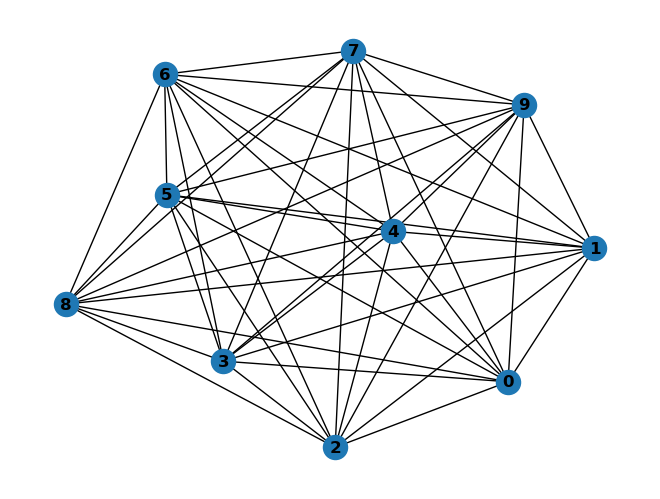

Probability Matrix computed using MCMC-MH using a Complete-Graph on 10 vertices with Max-Degree 10 :
[[0.4085 0.0071 0.0455 0.0951 0.1000 0.1000 0.1000 0.0181 0.0257 0.1000]
 [0.1000 0.1000 0.1000 0.1000 0.1000 0.1000 0.1000 0.1000 0.1000 0.1000]
 [0.1000 0.0156 0.2883 0.1000 0.1000 0.1000 0.1000 0.0398 0.0564 0.1000]
 [0.1000 0.0074 0.0478 0.3987 0.1000 0.1000 0.1000 0.0190 0.0270 0.1000]
 [0.0682 0.0048 0.0310 0.0649 0.5012 0.1000 0.1000 0.0123 0.0175 0.1000]
 [0.0323 0.0023 0.0147 0.0307 0.0473 0.7115 0.0899 0.0058 0.0083 0.0573]
 [0.0359 0.0025 0.0163 0.0341 0.0526 0.1000 0.6789 0.0065 0.0092 0.0638]
 [0.1000 0.0391 0.1000 0.1000 0.1000 0.1000 0.1000 0.1609 0.1000 0.1000]
 [0.1000 0.0276 0.1000 0.1000 0.1000 0.1000 0.1000 0.0705 0.2019 0.1000]
 [0.0563 0.0040 0.0256 0.0535 0.0825 0.1000 0.1000 0.0102 0.0144 0.5535]]
Stationary Distribution of above matrix :
[[0.0830 0.0059 0.0378 0.0790 0.1217 0.2574 0.2313 0.0150 0.0213 0.1476]]
Desired Stationary Distribution:
[[0.0830 0.0059 0.0

In [20]:
dim = 10
# create a random stationary distribution that we want
pi = generate_a_random_probability_vector(dim)

# let us first try a Complete Markov Chain
p, max_degree = MCMC_MH(pi, generate_a_complete_graph(dim, True))

# compute the stationary probability distribution of this probability matrix
pi_estimate = compute_left_eigenvector(p)
print ("Probability Matrix computed using MCMC-MH using a Complete-Graph on", dim, "vertices with Max-Degree", int(max_degree), ":")
print (p)
print ("Stationary Distribution of above matrix :")
print (pi_estimate)
print ("Desired Stationary Distribution:")
print (np.matrix(pi))

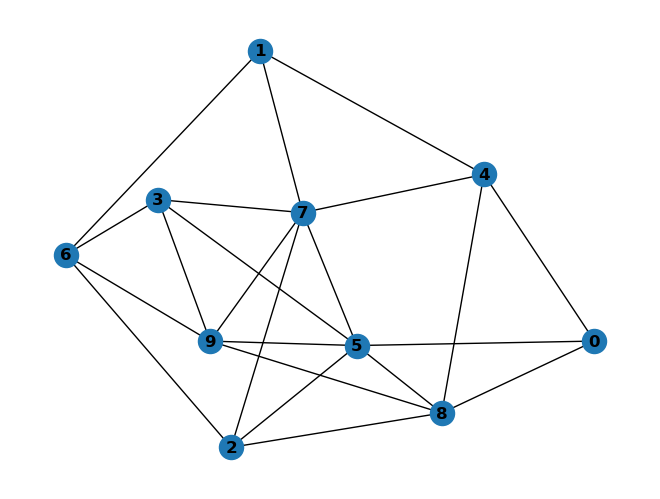

Probability Matrix computed using MCMC-MH using a Connected-But-Incomplete-Graph on 10 vertices with Max-Degree 7 :
[[0.6776 0.0000 0.0000 0.0000 0.1429 0.1429 0.0000 0.0000 0.0367 0.0000]
 [0.0000 0.5714 0.0000 0.0000 0.1429 0.0000 0.1429 0.1429 0.0000 0.0000]
 [0.0000 0.0000 0.5769 0.0000 0.0000 0.1429 0.1429 0.0568 0.0805 0.0000]
 [0.0000 0.0000 0.0000 0.5443 0.0000 0.1429 0.1429 0.0272 0.0000 0.1429]
 [0.0974 0.0069 0.0000 0.0000 0.8530 0.0000 0.0000 0.0176 0.0250 0.0000]
 [0.0461 0.0000 0.0210 0.0438 0.0000 0.7870 0.0000 0.0083 0.0118 0.0819]
 [0.0000 0.0036 0.0233 0.0488 0.0000 0.0000 0.8331 0.0000 0.0000 0.0912]
 [0.0000 0.0559 0.1429 0.1429 0.1429 0.1429 0.0000 0.2298 0.0000 0.1429]
 [0.1429 0.0000 0.1429 0.0000 0.1429 0.1429 0.0000 0.0000 0.2857 0.1429]
 [0.0000 0.0000 0.0000 0.0765 0.0000 0.1429 0.1429 0.0145 0.0206 0.6027]]
Stationary Distribution of above matrix :
[[0.0830 0.0059 0.0378 0.0790 0.1217 0.2574 0.2313 0.0150 0.0213 0.1476]]
Desired Stationary Distribution:
[[0.

In [21]:
# use an adjacency matrix that is different from fully-connected graph used earlier
adjacency1 = generate_a_random_strongly_connected_undirected_graph(dim, True)
p1, max_degree1 = MCMC_MH(pi, adjacency1)
pi_estimate1 = compute_left_eigenvector(p1)
print ("Probability Matrix computed using MCMC-MH using a Connected-But-Incomplete-Graph on", dim, "vertices with Max-Degree", int(max_degree1), ":")
print (p1)
print ("Stationary Distribution of above matrix :")
print (pi_estimate1)
print ("Desired Stationary Distribution:")
print (np.matrix(pi))

In [22]:
# which one is better?
w, _ = np.linalg.eig(p)
w1, _ = np.linalg.eig(p1)
# look at the 2nd largest eigenvalue 
print("The 2nd-Largest Eigenvalue of the Complete Markov Chain is                 : ", np.sort(w)[dim-2])
print("The 2nd-Largest Eigenvalue of the Connected-but-Incomplete Markov Chain is : ", np.sort(w1)[dim-2])

The 2nd-Largest Eigenvalue of the Complete Markov Chain is                 :  0.6114605720280911
The 2nd-Largest Eigenvalue of the Connected-but-Incomplete Markov Chain is :  0.9215586823091495


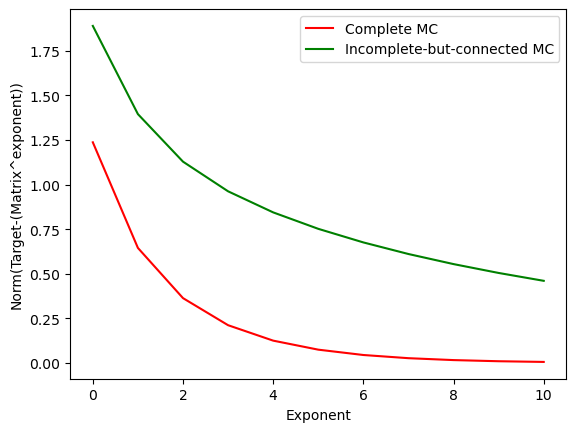

In [23]:
# In the limit both probability-matrices-when-raised-to-a-large-exponent will result in a matrix
# where all rows look the same as the desired stationary probability distribution 
target = [[None for x in range(dim)] for y in range(dim)]
for i in range(dim) :
    target[i] = pi

max_exponent = 10
complete_connected_markov_chain_norm = []
partially_connected_markov_chain_norm = []
ccmc = p
pcmc = p1
complete_connected_markov_chain_norm.extend([np.linalg.norm(target-ccmc)])
partially_connected_markov_chain_norm.extend([np.linalg.norm(target-pcmc)])

for i in range(max_exponent) :
    ccmc = np.matmul(ccmc, p)
    pcmc = np.matmul(pcmc, p1)
    complete_connected_markov_chain_norm.extend([np.linalg.norm(target-ccmc)])
    partially_connected_markov_chain_norm.extend([np.linalg.norm(target-pcmc)])

x = range(max_exponent+1)
plot1 = plt.plot(x,complete_connected_markov_chain_norm,'r', label = 'Complete MC')
plot2 = plt.plot(x,partially_connected_markov_chain_norm,'g', label = 'Incomplete-but-connected MC')
plt.legend(loc='upper right')
plt.xlabel('Exponent')
plt.ylabel('Norm(Target-(Matrix^exponent))')
plt.show()

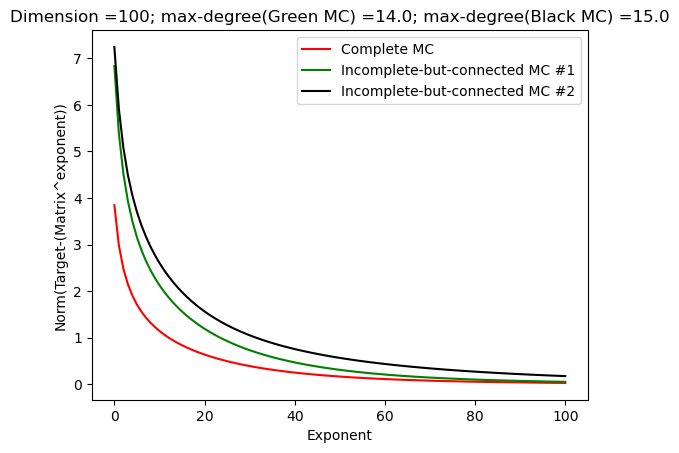

In [24]:
dim = 100
# create a random stationary distribution that we want
pi = generate_a_random_probability_vector(dim)

# let us first try a Complete Markov Chain
p, _ = MCMC_MH(pi, generate_a_complete_graph(dim, False))

# following this, let us try two not-complete Markov Chains
p_1, max_deg1 = MCMC_MH(pi, generate_a_random_strongly_connected_undirected_graph(dim, False))
p_2, max_deg2 = MCMC_MH(pi, generate_a_random_strongly_connected_undirected_graph(dim, False))

# let us plot how quickly these three Markov Chains get to the stationary distribution
target = [[None for x in range(dim)] for y in range(dim)]
for i in range(dim) :
    target[i] = pi

max_exponent = 100
complete_connected_markov_chain_norm = []
partially_connected_markov_chain_norm_1 = []
partially_connected_markov_chain_norm_2 = []
ccmc = p
pcmc_1 = p_1
pcmc_2 = p_2

complete_connected_markov_chain_norm.extend([np.linalg.norm(target-ccmc)])
partially_connected_markov_chain_norm_1.extend([np.linalg.norm(target-pcmc_1)])
partially_connected_markov_chain_norm_2.extend([np.linalg.norm(target-pcmc_2)])

for i in range(max_exponent) :
    ccmc = np.matmul(ccmc, p_1)
    pcmc_1 = np.matmul(pcmc_1, p_1)
    pcmc_2 = np.matmul(pcmc_2, p_2)
    complete_connected_markov_chain_norm.extend([np.linalg.norm(target-ccmc)])
    partially_connected_markov_chain_norm_1.extend([np.linalg.norm(target-pcmc_1)])
    partially_connected_markov_chain_norm_2.extend([np.linalg.norm(target-pcmc_2)])

x = range(max_exponent+1)
plot1 = plt.plot(x,complete_connected_markov_chain_norm,'r', label = 'Complete MC')
plot2 = plt.plot(x,partially_connected_markov_chain_norm_1,'g', label = 'Incomplete-but-connected MC #1')
plot3 = plt.plot(x,partially_connected_markov_chain_norm_2,'k', label = 'Incomplete-but-connected MC #2')
plt.title('Dimension =' + str(dim) + '; max-degree(Green MC) =' + str(max_deg1) + '; max-degree(Black MC) =' + str(max_deg2))
plt.xlabel('Exponent')
plt.ylabel('Norm(Target-(Matrix^exponent))')
plt.legend(loc='upper right')
plt.show()

In [25]:
# which one is better?
w, _ = np.linalg.eig(p)
w1, _ = np.linalg.eig(p_1)
w2, _ = np.linalg.eig(p_2)
# look at the 2nd largest eigenvalue 
print("The 2nd-Largest Eigenvalue of the Complete (Red) Markov Chain is                   : ", np.sort(w)[dim-2])
print("The 2nd-Largest Eigenvalue of the Connected-but-Incomplete (Green) Markov Chain is : ", np.sort(w1)[dim-2])
print("The 2nd-Largest Eigenvalue of the Connected-but-Incomplete (Black) Markov Chain is : ", np.sort(w2)[dim-2])

The 2nd-Largest Eigenvalue of the Complete (Red) Markov Chain is                   :  0.7638336149379621
The 2nd-Largest Eigenvalue of the Connected-but-Incomplete (Green) Markov Chain is :  0.9687246673310046
The 2nd-Largest Eigenvalue of the Connected-but-Incomplete (Black) Markov Chain is :  0.9807371302356166


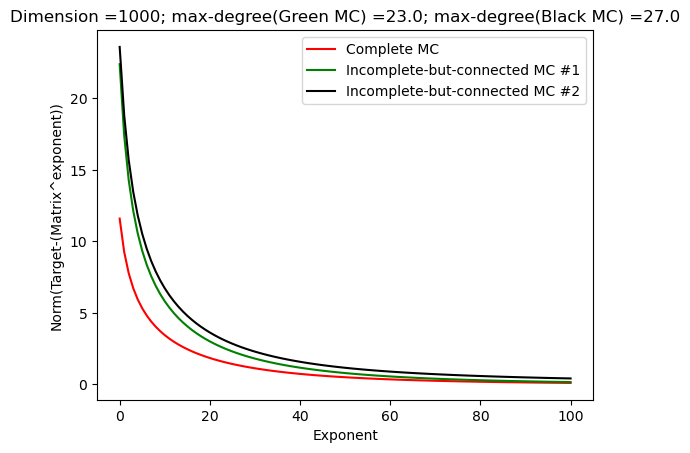

The 2nd-Largest Eigenvalue of the Complete (Red) Markov Chain is                   :  0.8475802382015228
The 2nd-Largest Eigenvalue of the Connected-but-Incomplete (Green) Markov Chain is :  0.9760995810633143
The 2nd-Largest Eigenvalue of the Connected-but-Incomplete (Black) Markov Chain is :  0.9887205252297491


In [26]:
dim = 1000
# create a random stationary distribution that we want
pi = generate_a_random_probability_vector(dim)

# let us first try a Complete Markov Chain
p, _ = MCMC_MH(pi, generate_a_complete_graph(dim, False))

# following this, let us try two not-complete Markov Chains
p_1, max_deg1 = MCMC_MH(pi, generate_a_random_strongly_connected_undirected_graph(dim, False))
p_2, max_deg2 = MCMC_MH(pi, generate_a_random_strongly_connected_undirected_graph(dim, False))

# let us plot how quickly these three Markov Chains get to the stationary distribution
target = [[None for x in range(dim)] for y in range(dim)]
for i in range(dim) :
    target[i] = pi

max_exponent = 100
complete_connected_markov_chain_norm = []
partially_connected_markov_chain_norm_1 = []
partially_connected_markov_chain_norm_2 = []
ccmc = p
pcmc_1 = p_1
pcmc_2 = p_2

complete_connected_markov_chain_norm.extend([np.linalg.norm(target-ccmc)])
partially_connected_markov_chain_norm_1.extend([np.linalg.norm(target-pcmc_1)])
partially_connected_markov_chain_norm_2.extend([np.linalg.norm(target-pcmc_2)])

for i in range(max_exponent) :
    ccmc = np.matmul(ccmc, p_1)
    pcmc_1 = np.matmul(pcmc_1, p_1)
    pcmc_2 = np.matmul(pcmc_2, p_2)
    complete_connected_markov_chain_norm.extend([np.linalg.norm(target-ccmc)])
    partially_connected_markov_chain_norm_1.extend([np.linalg.norm(target-pcmc_1)])
    partially_connected_markov_chain_norm_2.extend([np.linalg.norm(target-pcmc_2)])

x = range(max_exponent+1)
plot1 = plt.plot(x,complete_connected_markov_chain_norm,'r', label = 'Complete MC')
plot2 = plt.plot(x,partially_connected_markov_chain_norm_1,'g', label = 'Incomplete-but-connected MC #1')
plot3 = plt.plot(x,partially_connected_markov_chain_norm_2,'k', label = 'Incomplete-but-connected MC #2')
plt.title('Dimension =' + str(dim) + '; max-degree(Green MC) =' + str(max_deg1) + '; max-degree(Black MC) =' + str(max_deg2))
plt.xlabel('Exponent')
plt.ylabel('Norm(Target-(Matrix^exponent))')
plt.legend(loc='upper right')
plt.show()

# which one is better?
w, _ = np.linalg.eig(p)
w1, _ = np.linalg.eig(p_1)
w2, _ = np.linalg.eig(p_2)
# look at the 2nd largest eigenvalue 
print("The 2nd-Largest Eigenvalue of the Complete (Red) Markov Chain is                   : ", np.sort(w)[dim-2])
print("The 2nd-Largest Eigenvalue of the Connected-but-Incomplete (Green) Markov Chain is : ", np.sort(w1)[dim-2])
print("The 2nd-Largest Eigenvalue of the Connected-but-Incomplete (Black) Markov Chain is : ", np.sort(w2)[dim-2])

### Section 3.1: Metropolis-Hastings Algorithm for continuous distributions ##

We need to generate identically-distributed samples <i>X ∼ f(x)</i> according to some (complicated) PDF <i>f(•)</i> that can be computed upto a proportionality constant.  

Assume that for right now, you have a present value <i>x<sup>(j)</sup></i> for <i>X ∼ f(x)</i> .  You have access
to a known/well-understood <i>Proposal Distribution</i> $q(\bullet)$ that is conditioned on $x^{(j)}$.  You get a sample $\widehat{x} \sim q(x \mid x^{(j)})$,
you set $x^{(j+1)} = \widehat{x}$ with probability 
$$
p(\widehat{x}, x^{(j)}) = \min \left\{
1, \frac{f(\widehat{x})}{f(x^{(j)})} \times \frac{q(x^{(j)} \mid \widehat{x})}{q(\widehat{x} \mid x^{(j)})}
\right\}.
$$
The sequence of (not necessarily independent) samples $\{x^{(j)}\}_{j=1}^\infty$ will be distributed according $f(x)$.   
In many cases, we will pick <i>Proposal Distributions</i> that are symmetric, that is, $q(x^{(j)} \mid \widehat{x}) = q(\widehat{x} \mid x^{(j)})$, in which 
case the above expression simplifies to 
$$
p(\widehat{x}, x^{(j)}) = \min \left\{
1, \frac{f(\widehat{x})}{f(x^{(j)})} 
\right\}.
$$

Suppose we use 
$$
q(\widehat{x} \mid  x^{(j)}) = N( x^{(j)}, 1)
$$ 
(i.e. it returns r.v.'s that are Normally-distributed with <i>mean x<sup>(j)</sup></i> with <i>variance</i> of 1), we have a <i>Symmetric Proposal Distribution</i> (cf. the definition/discussion above).  That is, 
$$
\widehat{x} \sim N( x^{(j)}, 1)
$$ 
which means we are drawing $\widehat{x}$ from a unit-normal centered around a mean of <i>x<sup>(j)</sup></i>.  The probability of getting $\widehat{x}$ under this scheme is exactly the same that of getting <i>x<sup>(j)</sup></i> from a unit-normal centered around a mean of $\widehat{x}$.  See figure below for a graphic illustration -- this means that this specific Proposal Distribution is symmetric and we can use the simplified equation shown above. 

![symmetric](Figures/symmetric.pdf)

In contrast, suppose 
$$
q(\widehat{x} \mid  x^{(j)}) = {\sf Uniform}(x^{(j)}, x^{(j)}+10)
$$ 
(i.e. it returns r.v.'s that are Uniformly-distributed between $x^{(j)}$ and $x^{(j)}+10$).  We do not have a symmetric Proposal Distribution. From the figure shown below you can see that if we got $\widehat{x}$ from the Uniform-Distribution whose minimal-value is <i>x<sup>(j)</sup></i>, then it is impossible to get <i>x<sup>(j)</sup></i> from the Uniform-Distribution whose left-most value is $\widehat{x}$.  Clearly, one of the probabilities is $\frac{1}{10}$, while the other is zero. Not symmetric. 

![non_symmetric](Figures/non_symmetric.pdf)

The meta-message is this -- you can always derive samples from any distribution by using a (carefully selected) Proposal Distribution. 

#### I.I.D. Multivariate Gaussian RV Generation using the Metropolis-Hasting Algorithm ####

The <i>Proposal Distribution</i> is the <i>d</i>-dimensional Multivariate Gaussian with zero-mean (i.e. <b>μ</b> = <b>0</b>) and Unit-Covariance (i.e. <b>Σ</b> = <b>I</b>).  Assume that for right now we have generated 
$$
\{{\bf x}_i\}_{i=1}^j,
$$
where 
${\bf x}_i \sim N({\bf x}, \bf{\mu}, \bf{\Sigma})$.   We can generate RVs $\widehat{\bf x} \sim N({\bf x}, {\bf x}_j, {\bf I})$ as
$\widehat{\bf x} = {\bf x}_j + {\bf y}$, where ${\bf y} \sim N({\bf y}, {\bf 0}, {\bf I})$ (which can be generated by $d$-many calls to unit-normal RV generator).  

Since the Proposal Distribution is symmetric, following my notes on the material in Chapter 4 of the text, we accept $\widehat{\bf x}$ with probability 
$$
p(\widehat{\bf x}, {\bf x}_{j}) = \min \left\{
1, \frac{f(\widehat{\bf x})}{f({\bf x}_j)} 
\right\} = \min \left\{
1, \frac{e^{-\frac{1}{2}(\widehat{\bf x} - \bf{\mu})^T \bf{\Sigma}^{-1} (\widehat{\bf x} - \bf{\mu})}}{e^{-\frac{1}{2}({\bf x} - \bf{\mu})^T \bf{\Sigma}^{-1} ({\bf x} - \bf{\mu})}}
\right\}.
$$
If $\widehat{\bf x}$ is rejected, the process is repeated with no change.  If $\widehat{\bf x}$ is accepted, then 
$\{{\bf x}_i\}_{i=1}^{j+1} \leftarrow \{{\bf x}_i\}_{i=1}^j \cup \{\widehat{\bf x}\}$, and the process repeats with 
$j \leftarrow (j+1)$.  That is, we present $\widehat{\bf x}$ as the $(j+1)$-th RV ${\bf x}_{j+1} \sim N({\bf x}, \bf{\mu}, \bf{\Sigma})$.

In [27]:
# Multivariate Gaussian RV generator using MCMC-MH
#
# Written by Prof. R.S. Sreenivas for
# IE531: Algorithms for Data Analytics
#

import sys
import argparse
import random
import numpy as np 
import time
import math
import matplotlib.pyplot as plt
import itertools as it

# need this to keep the matrix print statements to 4 decimal places
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})

In [28]:
# This is the discriminant function that will be used in p(x_hat, x_j) described 
# in my notes above
def MH_Discriminant(current_value, previous_value, covariance_matrix, mean) :
    a = ((current_value - mean)@np.linalg.inv(covariance_matrix))@(current_value - mean)
    b = ((previous_value - mean)@np.linalg.inv(covariance_matrix))@(previous_value - mean)
    x = math.exp(-a/2)/math.exp(-b/2)
    return x

In [29]:
# This procedure generates a Spherical Gaussian Multivariate RV that is centered at
# the "current_location"
def Indepedent_Multivariate_Unit_Normal_Generator(dimension, current_location) :
    return (np.random.multivariate_normal(np.zeros(dimension), np.identity(dimension)) + current_location)

In [30]:
# This procedure essentially implements the random-walk that generates Multivariate Gaussain RVs
# that are *not* Spherical using the Spherical-RV-Generator as the "proposal distribution" 
def IID_Multivariate_RV_Generator(dimension, covariance_matrix, mean, number_of_samples) :
    # generate the first-sample from the proposal distribtion (the independent gaussian RV generator)
    y_prev = Indepedent_Multivariate_Unit_Normal_Generator(dimension, np.zeros(dimension))
    data_array = y_prev
    
    while (len(data_array) < number_of_samples) :
        # generate the next-sample from the proposal distribtion (the independent gaussian RV generator)
        y_current = Indepedent_Multivariate_Unit_Normal_Generator(dimension, y_prev)
        
        # use the MCMC-MH discriminant to decide if we are going to accept/reject this new sample
        if (np.random.random() < MH_Discriminant(y_current, y_prev, covariance_matrix, mean)) :
            data_array = np.vstack([data_array, y_current])
            y_prev = y_current
        else : 
            data_array = np.vstack([data_array, y_prev]) 
            # I am outputting y_prev as this is a "self-loop" in the MC
            # There are some that think that generating the same output again is not needed.
    
    return data_array

In [31]:
# Testing the procedure for the 2-D case... 
dim = 2
no_of_trials = 10000
covariance_matrix = np.array([[0.75, 0.25], [0.25, 0.5]])
mean = np.array([1, 2])
result = IID_Multivariate_RV_Generator(dim, covariance_matrix, mean, no_of_trials)

In [32]:
print ("Multivariate Normal RV Generation")
print ("Dimension = ", dim)
print ("Number of Trials = ", no_of_trials)

print ("\nTheoretical Mean: \n", np.matrix(mean))
print ("Empirical Mean:   \n", np.mean(result, axis=0))
print ("\nTheoretical Covariance Matrix: \n", np.matrix(covariance_matrix))
print ("Empirical Covariance Matrix: \n", (np.cov(result.T)))

Multivariate Normal RV Generation
Dimension =  2
Number of Trials =  10000

Theoretical Mean: 
 [[1 2]]
Empirical Mean:   
 [0.9920 1.9833]

Theoretical Covariance Matrix: 
 [[0.7500 0.2500]
 [0.2500 0.5000]]
Empirical Covariance Matrix: 
 [[0.7488 0.2322]
 [0.2322 0.4808]]


In [33]:
# let us do something that is more than just 2-dimensions
# Generating a random Postive-Definite-Matrix for the covariance-matrix
# you will need sklearn for this

from sklearn import datasets
dim = 4
# generating a random (dim x 1) vector as the mean
mean = np.random.rand(dim)
# generating a random Postiive-Definite-Matrix as Covariance-Matrix
C = datasets.make_spd_matrix(dim)

no_of_trials = 100000
result = IID_Multivariate_RV_Generator(dim, C, mean, no_of_trials)

print ("Multivariate Normal RV Generation")
print ("Dimension = ", dim)
print ("Number of Trials = ", no_of_trials)

print ("\nTheoretical Mean: \n", np.matrix(mean))
print ("Empirical Mean:   \n", np.mean(result, axis=0))
print ("Norm of the Difference between Theoretical- and Empricial-Mean :\n", 
       np.linalg.norm(np.mean(result, axis=0) - mean))

print("\nTheoretical Covariance Matrix: \n", np.matrix(C))
print("Empirical Covariance Matrix: \n", (np.cov(result.T)))
print ("Norm of the Difference between Theoretical- and Empricial-Covariance :\n", 
       np.linalg.norm(np.cov(result.T) - C))

Multivariate Normal RV Generation
Dimension =  4
Number of Trials =  100000

Theoretical Mean: 
 [[0.9076 0.4732 0.4758 0.0846]]
Empirical Mean:   
 [0.9014 0.5056 0.4312 0.0896]
Norm of the Difference between Theoretical- and Empricial-Mean :
 0.055779175971810806

Theoretical Covariance Matrix: 
 [[0.7116 -0.1864 0.1904 -0.1793]
 [-0.1864 1.3280 -1.7702 0.0833]
 [0.1904 -1.7702 3.3799 -0.4666]
 [-0.1793 0.0833 -0.4666 0.3593]]
Empirical Covariance Matrix: 
 [[0.7096 -0.1769 0.1706 -0.1750]
 [-0.1769 1.3441 -1.8116 0.0937]
 [0.1706 -1.8116 3.4727 -0.4880]
 [-0.1750 0.0937 -0.4880 0.3632]]
Norm of the Difference between Theoretical- and Empricial-Covariance :
 0.1203274103940179


Everything looks OK. Let us move on to the next MCMC algorithm.

***

## Section 4: Gibbs Sampling ##

The text deals with the <i>Gibb-Sampling Algorithm</i> quite well.  I will go over the details in class. It is important to note that for this algorithm, we assume a specific structure for the underlying Markov Chain. Keep in mind that the example in figure 4.3 of the text is not quite right.  The stationary probability distribution at the top right-hand corner of this figure does not add up to unity.  Consequently, the results shown in the book are incorrect; but, the algorithm is correct. 

The sample code shown below illustrates the various concepts that go into this algorithm. 
***

In [34]:
# Gibbs-Sampling procedure to compute the Probability Matrix of a Discrete-Time Markov
# Chain whose states are the d-dimensional cartesian product of the form 
# {0,1,...n-1} x {0,1,...n-1} x ... X {0,1,...n-1} (i.e. d-many products)
# 
# The target stationary distribution is expressed over the n**d many states 
#
# Written by Prof. R.S. Sreenivas for
# IE531: Algorithms for Data Analytics
#

import random
import numpy as np 
import math
import time
import matplotlib.pyplot as plt
import itertools as it

# need this to keep the matrix print statements to 4 decimal places
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})

In [35]:
# This function computes a random n-dimensional probability vector (whose entries sum to 1)
def generate_a_random_probability_vector(n) :
    x = []
    for i in range(n-1) :
        x.extend([np.random.uniform()])
    x = np.sort(x)

    y = [x[0]]
    for i in range(1,n-1) :
        y.extend([x[i]-x[i-1]])
    y.extend([1.0-x[n-2]])
    return y

In [36]:
# Two d-tuples x and y are Gibbs-Neighbors if they are identical, or they differ in value at just
# one coordinate
def check_if_these_states_are_gibbs_neighbors(x, y) :
    # x and y are dim-tuples -- we will assume they are not equal
    # count the number of coordinates where they differ
    check = 0
    for i in range(len(x)) :
        if (x[i] != y[i]) :
            check = check + 1
            free_index = i
    
    # they are neighbors only if the differ along one of the coordinates or less
    if (check <= 1) :
        return True
    else:
        return False

In [37]:
# Given two Gibbs-Neighbors -- that are not identical -- find the coordinate where they differ in value
# this is the "free-coordinate" for this pair
def free_coordinates_of_gibbs_neighbors(x, y) :
    # we assume x and y are gibbs neighbors, then the must agree on at least (dim-1)-many coordinates
    # or, they will disagree on just one of the (dim)-many coordinates... we have to figure out which 
    # coordinate/axes is free
    free_index = None 
    for i in range(len(x)) :
        if (x[i] != y[i]) :
            free_index = i
    
    return free_index

In [38]:
# x in a dim-tuple (i.e. if dim = 2, it is a 2-tuple; if dim = 4, it is a 4-tuple) state of the Gibbs MC
# each of the dim-many variables in the dim-tuple take on values over range(n)... this function returns 
# the lexicographic_index (i.e. dictionary-index) of the state x
def get_lexicographic_index(x, n, dim) :
    number = 0
    for i in range(dim) :
        number += (n**int(dim-i-1))*x[i]
    return number

In [39]:
# This is an implementaton of the Gibbs-Sampling procedure
# The MC has n**dim many states; the target stationary distribution is pi
# The third_variable_is when set to True, prints the various items involved in the procedure
# (not advisable to print for large MCs)
def create_gibbs_MC(n, dim, pi, do_want_to_print) :
    if (do_want_to_print) :
        print ("Generating the Probability Matrix using Gibbs-Sampling")
        print ("Target Stationary Distribution:")
        for x in it.product(range(n), repeat = dim) :
            number = get_lexicographic_index(x, n, dim)
            print ("\u03C0", x, " = \u03C0(", number , ") = ", pi[number])
    
    # the probability matrix will be (n**dim) x (n**dim) 
    probability_matrix = [[0 for x in range(n**dim)] for y in range(n**dim)]
    
    # the state of the MC is a dim-tuple (i.e. if dim = 2, it is a 2-tuple; if dim = 4, it is a 4-tuple)
    # got this from https://stackoverflow.com/questions/7186518/function-with-varying-number-of-for-loops-python
    for x in it.product(range(n), repeat = dim) :
        # x is a dim-tuple where each variable ranges over 0,1,...,n-1
        for y in it.product(range(n), repeat = dim) :
            if ((check_if_these_states_are_gibbs_neighbors(x, y)) and (x != y)) :
                # x and y (x != y) are gibbs-neighbors -- which means you can have a state-transition from x to y
                free_index = free_coordinates_of_gibbs_neighbors(x, y)
                
                # compute sum along this free_index
                sum = 0
                for z in it.product(range(n), repeat = dim) :
                    if ((check_if_these_states_are_gibbs_neighbors(x, z)) and 
                        ((free_coordinates_of_gibbs_neighbors(x, z) == free_index) or 
                         (free_coordinates_of_gibbs_neighbors(x, z) == None))) :
                        sum += pi[get_lexicographic_index(z, n, dim)]
                
                probability_matrix[get_lexicographic_index(x, n, dim)][get_lexicographic_index(y, n, dim)] = (1/dim) * pi[get_lexicographic_index(y, n, dim)]/sum
    
    # diagonal entries of the probability matrix
    B = np.ones((n**dim,1))
    C = np.matmul(probability_matrix, B)
    
    for x in it.product(range(n), repeat = dim) :
        probability_matrix[get_lexicographic_index(x, n, dim)][get_lexicographic_index(x, n, dim)] = 1 - C[get_lexicographic_index(x, n, dim)].item()
    
    return probability_matrix

In [40]:
# Trial 1... States: {(0,0), (0,1), (1,0), (1,1)} (i.e. 4 states)
n = 2
dim = 2
a = generate_a_random_probability_vector(n**dim)
print("(Random) Target Stationary Distribution\n", a)
p = create_gibbs_MC(n, dim, a, True) 
print ("Probability Matrix:")
print (np.matrix(p))
print ("Does the Probability Matrix have the desired Stationary Distribution?", np.allclose(np.matrix(a), np.matrix(a)* np.matrix(p)))

(Random) Target Stationary Distribution
 [0.012589707947271656, 0.09669065402237931, 0.42986186060852893, 0.4608577774218201]
Generating the Probability Matrix using Gibbs-Sampling
Target Stationary Distribution:
π (0, 0)  = π( 0 ) =  0.012589707947271656
π (0, 1)  = π( 1 ) =  0.09669065402237931
π (1, 0)  = π( 2 ) =  0.42986186060852893
π (1, 1)  = π( 3 ) =  0.4608577774218201
Probability Matrix:
[[0.0718 0.4424 0.4858 0.0000]
 [0.0576 0.5291 0.0000 0.4133]
 [0.0142 0.0000 0.7271 0.2587]
 [0.0000 0.0867 0.2413 0.6720]]
Does the Probability Matrix have the desired Stationary Distribution? True


In [41]:
# Trial 2... States{(0,0), (0,1),.. (0,9), (1,0), (1,1), ... (9.9)} (i.e. 100 states)
n = 10
dim = 2
a = generate_a_random_probability_vector(n**dim)
p = create_gibbs_MC(n, dim, a, False) 
print ("Does the Probability Matrix have the desired Stationary Distribution?", np.allclose(np.matrix(a), np.matrix(a)* np.matrix(p)))

Does the Probability Matrix have the desired Stationary Distribution? True


In [42]:
# Trial 3... 1000 states 
n = 10
dim = 3
t1 = time.time()
a = generate_a_random_probability_vector(n**dim)
p = create_gibbs_MC(n, dim, a, False) 
t2 = time.time()
hours, rem = divmod(t2-t1, 3600)
minutes, seconds = divmod(rem, 60)
print ("It took ", hours, "hours, ", minutes, "minutes, ", seconds, "seconds to finish this task")
print ("Does the Probability Matrix have the desired Stationary Distribution?", np.allclose(np.matrix(a), np.matrix(a)* np.matrix(p)))

It took  0.0 hours,  0.0 minutes,  13.785528898239136 seconds to finish this task
Does the Probability Matrix have the desired Stationary Distribution? True


In [43]:
# Trial 4... 10000 states 
n = 10
dim = 4
t1 = time.time()
a = generate_a_random_probability_vector(n**dim)
p = create_gibbs_MC(n, dim, a, False) 
t2 = time.time()
hours, rem = divmod(t2-t1, 3600)
minutes, seconds = divmod(rem, 60)
print ("It took ", hours, "hours, ", minutes, "minutes, ", seconds, "seconds to finish this task")
print ("Does the Probability Matrix have the desired Stationary Distribution?", np.allclose(np.matrix(a), np.matrix(a)* np.matrix(p)))

It took  0.0 hours,  33.0 minutes,  14.744441986083984 seconds to finish this task
Does the Probability Matrix have the desired Stationary Distribution? True


***
We can use [Gibbs Sampling](\href{https://en.wikipedia.org/wiki/Gibbs_sampling) to generate Multivariate Gaussian RVs. We can generate i.i.d. scalars <i>x ∼ N(μ, σ)</i>, with mean <i>μ</i> and standard-deviation <i>σ</i> using [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html).  The following [webpage](\href{http://fourier.eng.hmc.edu/e161/lectures/gaussianprocess/node7.html) {Save a small typo} 
derives the <i>marginal-</i> and <i>conditional distributions</i> of a <i>Multivariate Gaussian Distribution</i>.  Suppose the $d \times 1$ vector <b>x</b> is partitioned as 
$$
{\bf x} = \left(
\begin{array}{c}
{\bf x}_1 \\ {\bf x}_2
\end{array}
\right)
$$
where ${\bf x}_1$ is $(p \times 1)$ ${\bf x}_2$ is $(q \times 1)$ where $p + q = d$, where 
$$
{\bf x} \sim N({\bf x}, \bf{\mu}, \bf{\Sigma}); \bf{\mu} = \left(
\begin{array}{c}
\bf{\mu}_1 \\ \bf{\mu}_2
\end{array}
\right); \mbox{ and } \bf{\Sigma} = 
\left(
\begin{array}{cc}
\bf{\Sigma}_{11} & \bf{\Sigma}_{12} \\ 
\bf{\Sigma}_{21} & \bf{\Sigma}_{22} 
\end{array}
\right).
$$
It follows that $\bf{\Sigma}^T = \bf{\Sigma}$.  Then, it is known that the conditional distribution of ${\bf x}_i$ 
given the values of ${\bf x}_j$ is also Normally distributed 
$$
({\bf x}_i \mid {\bf x}_j) \sim N({\bf x}_i, (\bf{\mu}_i \mid \bf{\mu}_j), (\bf{\Sigma_i} \mid \bf{\Sigma_j})) 
$$
where 
$$
(\bf{\mu}_i \mid \bf{\mu}_j) = \bf{\mu}_i + \bf{\Sigma}_{ij}\bf{\Sigma}_{jj}^{-1}({\bf x}_j - \bf{\mu}_j)
$$
and 
$$
(\bf{\Sigma_i} \mid \bf{\Sigma_j}) = \bf{\Sigma}_{ii} - \bf{\Sigma}_{ji}^T \bf{\Sigma}_{jj}^{-1} \bf{\Sigma}_{ji}.   
$$

As a part of the programming assignments, you will implementation of a Multivariate Gaussian RV generator that uses Gibbs Sampling, you will assume <i>p = d-1</i> and <i>q = 1</i> for the sake of the assignment.  We know that 
$$
({\bf x}_2 \mid {\bf x}_1)
$$ 
is essentially a Univariate Gaussian (with known mean and variance; that can be computed using the above formula).  By making a call to the Univariate Gaussian RV generator, you can find a (random) value for ${\bf x}_2$.  The following [YouTube video](\href{https://www.youtube.com/watch?v=a_08GKWHFWo) describes the MCMC-part of the algorithm. You will have all figured out when you complete the programming assignment. 

***

## Section 5: Rate of Convergence of Markov Chains ##

Let <b>P</b> be an <i>n x n</i> probability matrix of a <i>Markov Chain</i> on <i>n</i> states. For $i, j \in \{1, 2, \ldots, n\}$, and $n \in \mathcal{N}$, consider the quantity
$$
\max_i {\bf P}^n_{i,j}. 
$$
To understand what this quantity represents, it might help to think of walks of length <i>n</i> on the Markov Chain that starts from the state <i>i</i> and ends up at the state <i>j</i>. We try all possible choices of the initial state <i>i</i> (for a given final state <i>j</i>), and pick the <i>n</i>-long path that has the maximum chance of getting getting to state <i>j</i> in <i>n</i>-many steps. The following quantity is defined analogously (as above) 
$$
\min_i {\bf P}^n_{i,j}.
$$
This is essentially the smallest chance of getting to state <i>j</i> using a path of length <i>n</i> from any initial state <i>i</i>. 
We have the following observations that follow directly from the definition of these quantities. 
<blockquote>
    <b>Observation</b>: For each <i>j</i> 
    <ol>
        <li>$\max_i {\bf P}^n_{i,j}$ is non-increasing in the exponent <i>n</i>.</li>
        <li>$\min_i {\bf P}^n_{i,j}$ is non-decreasing in the exponent <i>n</i>.</li>
    </ol>
</blockquote>

To see this, note that any <i>i</i> and <i>j</i>, and any length <i>n</i>
$$
{\bf P}_{i,j}^{n+1} = \sum_k {\bf P}_{i,k} \underbrace{{\bf P}_{k, j}^n}_{\leq \max_l {\bf P}^n_{l,j}} \leq \sum_k {\bf P}_{i,k} \left(\max_l {\bf P}^n_{l,j}\right) = \max_l {\bf P}^n_{l,j}.
$$
Since this holds for all values of <i>i</i>, it holds for the maximum value of <i>i</i> (cf. above definition). Therefore, $\max_i {\bf P}^{n+1}_{i,j} \leq \max_l {\bf P}^n_{l,j}$. That is, if we took one more step (i.e. <i>n+1</i>), the maximum expression either stays the same or decreases.

Replace <i>max</i> with <i>min</i>, and reverse the inequalities to get $\min_i {\bf P}^{n+1}_{i,j} \geq \min_l {\bf P}^n_{l,j}$. That is, if we took one more step (i.e. <i>n+1</i>), the minimum expression either stays the same or increases.

For a given <i>n</i> and <i>j</i>, let <i>l<sub>min</sub></i> be the state that minimizes ${\bf P}_{i,j}^n$ over <i>i</i>. It is not hard to see that the set of <i>(n+1)</i>-long paths from <i>i</i> to <i>j</i> can be partitioned into two sets as shown in the figure below.

![Rate_of_Covergence_fig1](Figures/rate_of_convergence_fig1.pdf)

Therefore, 
$$
{\bf P}_{i,j}^{n+1}  = \sum_k {\bf P}_{i,k} {\bf P}_{k,j}^n = \left\{\sum_{k \neq l_{min}} {\bf P}_{i,k} \underbrace{{\bf P}_{k,j}^n}_{\leq \max_l {\bf P}_{l,j}^n}\right\} + \left\{{\bf P}_{i,l_{min}}\left(\min_l {\bf P}_{l,j}^n \right)\right\} \leq  \left\{\overbrace{\sum_{k \neq l_{min}} {\bf P}_{i,k}}^{1-{\bf P}_{i, l_{min}}} \max_l {\bf P}_{l,j}^n\right\} + \left\{ {\bf P}_{i,l_{min}} \min_l {\bf P}_{l,j}^n \right\},
$$
and 
$$
{\bf P}_{i,j}^{n+1}  = \leq (1-{\bf P}_{i, l_{min}}) \max_l {\bf P}_{l,j}^n + ({\bf P}_{i, l_{min}}) \min_l {\bf P}_{l,j}^n = \max_l {\bf P}_{l,j}^n - {\bf P}_{i, l_{min}}\left(\max_l {\bf P}_{l,j}^n - \min_l {\bf P}_{l,j}^n \right)
$$
Since this equation holds for all <i>i</i>, it holds for the maximum possible value (as shown below) 
$$
\max_i {\bf P}_{i,j}^{n+1} \leq  \max_l {\bf P}_{l,j}^n - {\bf P}_{i, l_{min}}\left(\max_l {\bf P}_{l,j}^n - \min_l {\bf P}_{l,j}^n \right)
$$
Interchanging <i>max</i> with <i>min</i> and reversing inequalities, we get
$$
\min_i {\bf P}_{i,j}^{n+1} \geq  \min_l {\bf P}_{l,j}^n + {\bf P}_{i, l_{max}}\left(\max_l {\bf P}_{l,j}^n - \min_l {\bf P}_{l,j}^n \right)
$$
Let $\alpha = \min_{i,j} {\bf P}_{i,j}$, be the smallest entry in ${\bf P}$. For right now, assume all entries in ${\bf P}$ are strictly positive -- that is, the underlying directed graph of the Markov Chain is a <i>Complete</i> graph (i.e. every vertex is connected to every other vertex). This would mean that $\alpha < \frac{1}{2}$ (why?). We will handle the case when $\alpha = 0$ later. Then, the above inequalities can be written as 
$$
\max_i {\bf P}_{i,j}^{n+1} \leq  \max_l {\bf P}_{l,j}^n - \alpha\left(\max_l {\bf P}_{l,j}^n - \min_l {\bf P}_{l,j}^n \right)
$$
and
$$
\min_i {\bf P}_{i,j}^{n+1} \geq  \min_l {\bf P}_{l,j}^n + \alpha\left(\max_l {\bf P}_{l,j}^n - \min_l {\bf P}_{l,j}^n \right)
$$
Subtracting these inequalities, we get
$$
\max_i {\bf P}_{i,j}^{n+1} - \min_i {\bf P}_{i,j}^{n+1} \leq \left(\max_l {\bf P}_{l,j}^n - \min_l {\bf P}_{l,j}^n \right)(1 - 2\alpha)
$$
It follows that $\min_l {\bf P}_{l,j} \geq \alpha$ and $\max_l {\bf P}_{l,j} \leq (1-\alpha)$. Therefore, for $n = 1$ (base case of induction) we have 
$$
\max_i {\bf P}_{i,j}^{1} - \min_i {\bf P}_{i,j}^{1} \leq (1 - 2\alpha),
$$
which in turn implies that 
$$
\max_i {\bf P}_{i,j}^{n} - \min_i {\bf P}_{i,j}^{n} \leq (1 - 2\alpha)^n, 
$$
where $\alpha < \frac{1}{2}$. This would mean that 
$$
\lim_{n \rightarrow \infty} \max_i {\bf P}_{i,j}^{n} = \lim_{n \rightarrow \infty}  \min_i {\bf P}_{i,j}^{n}  = \pi_l
$$
To be more specific $\lim{n \rightarrow \infty} \max_i {\bf P}_{i,j}^{n}$ is the limit of a decreasing, non-negative sequence of numbers (it must exist). The above result says the maximum and minimum have the same limit. 

Now, what if $\alpha = 0$ (i.e. not all pair of states are connected by an edge in the graphical representation of the Markov Chain)? It can be shown that there exists an index <i>m</i> such that all entries of ${\bf P}^m$ are non-zero (why?). Following this, we can effectively use ${\bf P}^m$ as a proxy for the ${\bf P}$ in the above argument (yes, I am handwaving here a little). 

When we have many different choices for ${\bf P}$ that yields a desired $\pi$ (which is what we did with MCMC-MH and Gibbs Sampling), it is best to pick a ${\bf P}$ which has the largest possible value for $\alpha$ (why?). 

***

## Section 7: Some Issues with Markov Chains with Countably-Many States ##

If we have a strongly-connected, aperiodic, finite-state Markov Chain, then the visit-ratio will approach the stationary distribution (as we take "longer-and-longer" paths). This is not necessarily the case when we have a Markov Chain with countably-many states as illustrated by the example shown below. 

![non_ergodic](Figures/non_ergodic.pdf)

This chain has a stationary distribution of $\pi = (1\ 0\ 0\ \ldots)$. Crude analysis would suggest that if we started a random walk at (the state corresponding to) a large value for <i>n</i>, then the most likely outcome would be jumpt to state <i>(n+1)</i>, as the probability of this jump is $(1 - \frac{1}{n^2}) \approx 1$ (for large <i>n</i>). That is, the random walk would move rightwards for large <i>n</i>. If we took an <i>l</i>-long path from <i>n</i>, we would almost always end up in state <i>(n+l)</i>. We will very very rarely get to state <i>0</i> (following which we will remain there forever). This requires us to look into concepts like [Harris Recurrence](https://en.wikipedia.org/wiki/Harris_chain). I am skipping this important topic in the interest of time. 

***

## Section 8:  First-Passage Time ##

Some of the observations below are almost trivial for Finite-State Markov Chains, but things get complicated when we consider Markov Chains with countably-many states. 

<i>First-Passage Time Probability</i> $f_{i,j}(n)$ is the probability that a random walk starting from state <i>i</i> ends up in state <i>j</i> for the <u>first time</u> after <i>n</i>-steps. This would mean 
$$
f_{i,j}(1) = {\bf \Pi}_{i,j},
$$
and for $n \geq 2$,
$$
f_{i,j}(n) = Prob\{X_n = j, X_{n-1} \neq j,  X_{n-2} \neq j, \cdots,  X_{1} \neq j \mid X_0 = i\}.
$$
This is different from ${\bf \Pi}_{i,j}^n$, which is the probability of entering state <i>j</i> from <i>i</i> (may be many times; not just "once," i.e. "first-time") when we take a random walk of length <i>n</i>. It is not hard to see that 
$$
f_{i,j}(n) = \sum_{k \neq j} {\bf \Pi}_{i,k}f_{k,j}(n-1), n \geq 1,
$$
while $f_{i,j}(1) = {\bf \Pi}_{i,j}$. 

For $n \geq 1$, let  
$$
\mathcal{F}_{i,j}(n) = \sum_{m=1}^n f_{i,j}(m),
$$
which is the probability that a random walk from state <i>i</i> of length <i>n</i> contains a visit to <i>j</i>, some time. It is not hard to see that this will be non-decreasing in <i>n</i>, and has an upper bound of unity. If $\mathcal{F}_{i,j}(\infty) = 1$, it would mean that a random path starting from <i>i</i> will certainly enter state <i>j</i> sometime/eventually. For this case, let $T_{i,j}$ be the random variable that is the <i>first-passage time</i> from <i>i</i> to <i>j</i>. It is not hard to see that $f_{i,j}(n)$ is the probability mass function of $T_{i,j}$, while $\mathcal{F}_{i,j}(n)$ is the cummulative distribution function. In this context, $T_{j,j}$ would be the first-passage time from a state <i>j</i> back to itself. The state <i>j</i> is <i>recurrent</i> if $\mathcal{F}(\infty) = 1$, otherwise it is labeled as a <i>transient</i> state. Loosely, once a random-walk is "back (at the recurrent state)" then "what ever worked before, works the same again" -- it is not hard to see how the math gets simplified for recurrent-states. You can partition the states in a Markov Chain into groups of states that are strongly connected. These groups of states can be further labelled as being recurrent (i.e. all states in the group are recurrent), or transient (i.e. all states in the group are transient). 

If <i>j</i> is a recurrent state in a Markov Chain, and <i>i</i> is a state that is in the same group (i.e. <i>i</i> belongs to the set of states that are strongly connected to <i>j</i>). Suppose we start a random walk at state <i>i</i>, and we count the number of times the random walk visited state <i>j</i> after <i>t</i>-many steps, which we denote as $N_{i,j}(t)$, then (with probability 1)
$$
\lim_{t \rightarrow \infty} \frac{N_{i,j}(t)}{t} = \frac{1}{E\{T_{j,j}\}} \Rightarrow E\{T_{j,j}\} = \frac{1}{\pi_j }.
$$

The code shown below illustrates this concept for a randomly genenerated Markov Chain. 
***

In [44]:
# Illustration of First-Passage-Time in Markov Chains
#
# IE531: Algorithms for Data Analytics
# Prof. R.S. Sreenivas
#

import numpy as np 

# defining an variable to stop iterations
ERROR = 1.0e-6

In [45]:
# The familiar Repeated-Squaring Algorithm (to be used to compute the Left-Eigenvector of the probability matrix A)
def repeated_squaring(A, exponent) :
    if (exponent == 1) :
        return A
    else :
        if (exponent%2 == 1) :
            return (A * repeated_squaring(A*A, int((exponent-1)/2)))
        else :
            return (repeated_squaring(A*A, int(exponent/2)))

In [46]:
# Generating a random-row of a Stochastic Matrix of size (1 x n)
def generate_a_row_of_a_stochastic_matrix(n) :
    x = []
    for i in range(n-1) :
        x.extend([np.random.uniform()])
    x = np.sort(x)

    y = [x[0]]
    for i in range(1,n-1) :
        y.extend([x[i]-x[i-1]])
    y.extend([1.0-x[n-2]])
    return y

In [47]:
# Generating a random Stochastic Matrix of size (n x n)
def generate_a_stochastic_matrix(n) :
    probability_matrix = [[None for x in range(n)] for y in range(n)]
    for i in range(n) :
        probability_matrix[i] = generate_a_row_of_a_stochastic_matrix(n)
    return probability_matrix

In [48]:
# Computing the Left-Eigenvector of the randomly-generated Stochastic Matrix
def compute_left_eigenvector(A) :
    exponent = 100
    B1 = repeated_squaring(A, exponent)
    B2 = repeated_squaring(A, exponent+10)
    while (np.linalg.norm(B1-B2) > ERROR) :
        exponent = exponent + 10
        B1 = repeated_squaring(A, exponent)
        B2 = repeated_squaring(A, exponent+10)

    return (B2[0, :])

In [49]:
# figuring out the next-state to go to, which respects the probability matrix A
def next_state(A, current_state) :
    x = np.random.uniform()
    sum = A[current_state, 0]
    if (x < sum) :
        return 0
    else :
        for i in range(1,np.matrix(A).shape[1]) :
            if ( (x >= sum) and (x < sum + A[current_state, i]) ) :
                return i
            else :
                sum = sum + A[current_state, i]

In [50]:
matrix_dimension = 20
A = np.matrix(generate_a_stochastic_matrix(matrix_dimension))
x = compute_left_eigenvector(A) 
print ('Dimension of Stochastic Matrix A              = ' + str(matrix_dimension) + 'x' + str(matrix_dimension))
print ("Is (Left-Eigenvector) x A = (Left-Eigenvector)? ", np.allclose(np.matrix(x) * np.matrix(A), x))

Dimension of Stochastic Matrix A              = 20x20
Is (Left-Eigenvector) x A = (Left-Eigenvector)?  True


In [51]:
# Pick a random starting-state for the random walk 
randomly_chosen_starting_state_for_random_walk = np.random.randint(matrix_dimension)
# Start the walk from this state, and keep walking till you get back to this random starting-state
# Count the number of steps you took to come back... repeat this many times and present the average 
# number of steps you took to get back. This should be 1/component-of-Left-Eigenvector corresponding to the
# random starting state for the walk (according to the theory derived above)

no_of_trials = 500000

number_of_steps_to_randomly_chosen_starting_state_for_random_walk = 0
for i in range(no_of_trials) :
    current_state = next_state(A, randomly_chosen_starting_state_for_random_walk)
    time_step = 1
    while (current_state != randomly_chosen_starting_state_for_random_walk) :
        current_state = next_state(A, current_state)
        time_step = time_step + 1
    number_of_steps_to_randomly_chosen_starting_state_for_random_walk = number_of_steps_to_randomly_chosen_starting_state_for_random_walk + time_step

print ("We generated a random Markov-Chain with ", matrix_dimension, "-many states")
print ("We randomly selected state ", randomly_chosen_starting_state_for_random_walk, " to start a random walk")
print ("We counted the #steps to come back to this state by repeating this experiment ", no_of_trials, "-many times")
print ("On an average, it took ", number_of_steps_to_randomly_chosen_starting_state_for_random_walk/no_of_trials, "-many steps to come back to state ", randomly_chosen_starting_state_for_random_walk)
print ("The theoretical-value for this average is ", 1/x[0, randomly_chosen_starting_state_for_random_walk])

We generated a random Markov-Chain with  20 -many states
We randomly selected state  14  to start a random walk
We counted the #steps to come back to this state by repeating this experiment  500000 -many times
On an average, it took  17.450118 -many steps to come back to state  14
The theoretical-value for this average is  17.42531171042353


***

## Section 9:  Absorbing Markov Chains ##

A state <i>i</i> of a Markov Chain (with Transition Matrix ${\bf \Pi}$) is said to be <i>absorbing</i> if it is impossible to leave after reaching it. That is ${\bf \Pi}_{i,i} = 1$. A Markov chain is <i>absorbing</i> if it has at least one absorbing state, and if from every state it is possible to go to an absorbing state (not necessarily in one step). In an absorbing Markov chain, a state which is not absorbing is said to be a <i>transient</i> state.

The questions we would be interested in asking about absorbing Markov Chains are 
<ol>
    <li>Suppose we start a random walk at a known state, what is the probability of ending up at an absorbing state?</li>
    <li>As a follow-on to the previous question - on the average, how long would it take for the random walk to be absorbed?</li>
    <li>Continuing with the previous scenario - what are the average number of visits to the transient states for  the absorbing random?</li>
</ol>
This will depend on the the Transition Matrix ${\bf \Pi}$ and the initial state of the walk. This is best illustrated by an example known as the <i>Drukard's Walk</i>, which models a man's walk. State <i>0</i> (resp. <i>4</i>) is his home, if he is at home, he stays there

A man walks along a four-block stretch of Park Avenue (see Fig- ure 11.3). If he is at corner 1, 2, or 3, then he walks to the left or right with equal probability. He continues until he reaches corner 4, which is a bar, or corner 0, which is his home (resp. his Bar). If he reaches either home or the bar, he stays there. There are three corners in the path from his home and the Bar. At each corner the man takes a left (resp. right) turn with probability <i>1/2</i>. States <i>0</i> and <i>4</i> are <i>absorbing</i> states, while states <i>1, 2</i> and <i>3</i> are <i>transient states</i>.

![Drukard's Walk](Figures/drunkards_walk.pdf)

[From Example_11.3_in Grinstead and Snell’s Introduction to Probability](https://math.dartmouth.edu/~prob/prob/prob.pdf)

The $5 \times 5$ probability matrix is
$$
{\bf \Pi} = \left(
\begin{array}{ccccc}
1 & 0 & 0 & 0 & 0\\
\frac{1}{2} & 0 & \frac{1}{2} & 0 & 0\\
0 & \frac{1}{2} & 0 & \frac{1}{2} & 0\\
0 & 0 & \frac{1}{2} & 0 & \frac{1}{2}\\
0 & 0 & 0 & 0 & 1\\
\end{array}
\right)
$$

When we analyze absorbing Markov Chains we renumber the states such that the transient states (resp. the absorbing states) are on the top-left-hand-side (resp. bottom-right-hand-side) of the probability matrix. For whatever it is worth, this is called the <i>Canonical Form</i> of the Markov Chain. For the above example we can use the renumbering as shown below.

![Drukard's Walk Renumbered](Figures/drunkards_walk1.pdf)

The renumbered probability matrix is
$$
\widehat{\bf \Pi} = \left(
\begin{array}{cccccc}
0 & \frac{1}{2} & 0 & \bigm| & \frac{1}{2} & 0\\
\frac{1}{2} & 0 & \frac{1}{2} & \bigm| & 0 & 0\\
0 & \frac{1}{2} & 0 & \bigm| & 0 & \frac{1}{2}\\
- & - & - & \bigm| & - & -\\
0 & 0 & 0 & \bigm| & 1 & 0\\
0 & 0 & 0 & \bigm| & 0 & 1\\
\end{array}
\right) = \left(
\begin{array}{cc}
\left(
\begin{array}{ccc}
0 & \frac{1}{2} & 0\\
\frac{1}{2} & 0 & \frac{1}{2}\\
0 & \frac{1}{2} & 0
\end{array}
\right) & \left(
\begin{array}{cc}
\frac{1}{2} & 0\\
0 & 0\\
0 & \frac{1}{2}
\end{array}
\right)\\
\left(
\begin{array}{ccc}
0 & 0 & 0 \\ 0 & 0 & 0
\end{array}
\right) & \left(
\begin{array}{cc}
1 & 0\\
0 & 1
\end{array}
\right)
\end{array}
\right) = \left(
\begin{array}{cc}
{\bf Q} & {\bf R}\\ {\bf 0} & {\bf I}
\end{array}
\right)
$$

I am skipping the theoretical derivations (you can look it up in <i>Grinstead and Snell’s Introduction to Probability</i> at the link provided above). Let <i><b>N</b> = (<b>I</b> - <b>Q</b>)<sup>-1</sup></i>. Then,
<ol>
    <li><i><b>N</b><sub>i,j</sub></i> is the expected number of times that the absorbing random walk will be in the transient state <i>s<sub>j</sub></i> if the walk started in the transient state <i>s<sub>i</sub></i>.</li>
    <li>If the absorbing walk starts from the transient state <i>s<sub>i</sub></i>, and it takes <i>t<sub>i</sub></i>-many steps before it it gets absorbed, then <i>E{t<sub>i</sub>}</i> is the <i>i</i>-th entry in the vector <i><b>N</b> x <b>1</b></i>, where <b>1</b> is the vector of all ones. </li>
    <li>The probability, <i><b>b</b><sub>i,j</sub></i>, of a random, absorbing walk that starts at transient state <i>s<sub>i</sub></i>, terminates at absorbing state <i>s<sub>i</sub></i>, is given by the <i>i</i>-th row and <i>j</i>-th column of the matrix <b>NR</b>. </li>
</ol>

For the example above, 
$$
{\bf Q} = \left(
\begin{array}{ccc}
0 & \frac{1}{2} & 0\\
\frac{1}{2} & 0 & \frac{1}{2}\\
0 & \frac{1}{2} & 0
\end{array}
\right) \Rightarrow {\bf N} = ({\bf I} - {\bf Q})^{-1} = \left(
\begin{array}{ccc}
\frac{3}{2} & 1 & \frac{1}{2}\\
1 & 2 & 1\\
\frac{1}{2} & 1 & \frac{3}{2}
\end{array}
\right); {\bf N} \times {\bf 1} = \left(
\begin{array}{c}
3\\ 4\\ 3
\end{array}
\right); {\bf NR} = \left(
\begin{array}{cc}
\frac{3}{4} & \frac{1}{4}\\
\frac{1}{2} & \frac{1}{2}\\
\frac{1}{4} & \frac{3}{4}
\end{array}
\right).
$$
From this, we can infer -  
<ol>
    <li> The random, absorbing walk that starts at state <i>2</i>, would visit states <i>1</i>, <i>2</i>, and <i>3</i> on an average of <i>1</i>, <i>3</i> and <i>1</i>, times respectively.</li>
    <li> The random, absorbing walk that starts in states <i>1</i>, <i>2</i>, and <i>3</i>, would take on an average <i>3</i>, <i>4</i> and <i>3</i> steps respectively, before stopping. </li>
    <li> The random, absorbing walk that starts from state <i>1</i>, will terminate in absorbing state <i>0</i> (resp. absorbing state <i>4</i>) with probability 3/4 (resp. 1/4). The random, absorbing walk that starts from state <i>2</i>, will terminate in absorbing state <i>0</i> (resp. absorbing state <i>4</i>) with probability 1/2 (resp. 1/2). The random, absorbing walk that starts from state <i>3</i>, will terminate in absorbing state <i>0</i> (resp. absorbing state <i>4</i>) with probability 1/4 (resp. 3/4).</li>
</ol>

The code shown below verifies these claims for a randomly generated Markov Chain where the final two states are modified to be absorbing states. 
***

In [52]:
# Illustration of the theory of Absorbing Markov Chains
#
# IE531: Algorithms for Data Analytics
# Prof. R.S. Sreenivas
#

import numpy as np 

# defining an variable to stop iterations
ERROR = 1.0e-6

In [53]:
# The familiar Repeated-Squaring Algorithm (to be used to compute the Left-Eigenvector of the probability matrix A)
def repeated_squaring(A, exponent) :
    if (exponent == 1) :
        return A
    else :
        if (exponent%2 == 1) :
            return (A * repeated_squaring(A*A, int((exponent-1)/2)))
        else :
            return (repeated_squaring(A*A, int(exponent/2)))

In [54]:
# Generating a random-row of a Stochastic Matrix of size (1 x n)
def generate_a_row_of_a_stochastic_matrix(n) :
    x = []
    for i in range(n-1) :
        x.extend([np.random.uniform()])
    x = np.sort(x)

    y = [x[0]]
    for i in range(1,n-1) :
        y.extend([x[i]-x[i-1]])
    y.extend([1.0-x[n-2]])
    return y

In [55]:
# Generating a random Stochastic Matrix of size (n x n)
def generate_a_stochastic_matrix(n) :
    probability_matrix = [[None for x in range(n)] for y in range(n)]
    for i in range(n) :
        probability_matrix[i] = generate_a_row_of_a_stochastic_matrix(n)
    return probability_matrix

In [56]:
# figuring out the next-state to go to, which respects the probability matrix A
def next_state(A, current_state) :
    x = np.random.uniform()
    sum = A[current_state, 0]
    if (x < sum) :
        return 0
    else :
        for i in range(1,np.matrix(A).shape[1]) :
            if ( (x >= sum) and (x < sum + A[current_state, i]) ) :
                return i
            else :
                sum = sum + A[current_state, i]

In [57]:
matrix_dimension = 10
A = np.matrix(generate_a_stochastic_matrix(matrix_dimension))
# make the last two states of A as absorbing states
for i in range(matrix_dimension):
    A[matrix_dimension-2, i] = 0
    A[matrix_dimension-1, i] = 0
A[matrix_dimension-2, matrix_dimension-2] = 1
A[matrix_dimension-1, matrix_dimension-1] = 1
Q = A[0:matrix_dimension-2, 0:matrix_dimension-2]
R = A[0:matrix_dimension-2, matrix_dimension-2:matrix_dimension]
N = np.linalg.inv(np.identity(matrix_dimension-2) - Q)
ones = np.ones(matrix_dimension-2)[np.newaxis]
Average_Visit_Vector = N*ones.T
Probability_Vector = N*R

In [58]:
# pick a random transient state to start the random, absorbing walk
randomly_chosen_starting_state_for_random_walk = np.random.randint(matrix_dimension-2)
no_of_trials = 500000

number_of_steps_to_some_absorbing_state = 0

number_of_visits_to_absorbing_state1 = 0
number_of_visits_to_absorbing_state2 = 0

for i in range(no_of_trials) :
    current_state = next_state(A, randomly_chosen_starting_state_for_random_walk)
    time_step = 1
    while ((current_state != matrix_dimension-1) and (current_state != matrix_dimension-2)):
        current_state = next_state(A, current_state)
        time_step = time_step + 1
    
    # absorbing state #1
    if (current_state == matrix_dimension-2) :
        number_of_steps_to_some_absorbing_state = number_of_steps_to_some_absorbing_state + time_step
        number_of_visits_to_absorbing_state1 = number_of_visits_to_absorbing_state1 + 1
    
    # absorbing state #2
    if (current_state == matrix_dimension-1) :
        number_of_steps_to_some_absorbing_state = number_of_steps_to_some_absorbing_state + time_step   
        number_of_visits_to_absorbing_state2 = number_of_visits_to_absorbing_state2 + 1

print ("We generated a random Markov-Chain with ", matrix_dimension, " states")
print ("We modified the probability matrix to make states-", matrix_dimension-2, " and state-", matrix_dimension-1, " as absorbing states")
print ("We randomly selected state ", randomly_chosen_starting_state_for_random_walk, " to start a random walk")
print ("We counted the #steps it took for each random walk to terminate in one of the two absorbing states")
print ("We repeated this absorbing, random walk ", no_of_trials, "-many times")
print ("The random walk terminated on state-", matrix_dimension-2, " ", number_of_visits_to_absorbing_state1/no_of_trials, "% of the time")
print ("The theoretical value for this termination probability is: ", Probability_Vector[randomly_chosen_starting_state_for_random_walk,0])
print ("The random walk terminated on state-", matrix_dimension-1, " ", number_of_visits_to_absorbing_state2/no_of_trials, "% of the time")
print ("The theoretical value for this termination probability is: ", Probability_Vector[randomly_chosen_starting_state_for_random_walk,1])
print ("The random walk took an average of ", number_of_steps_to_some_absorbing_state/no_of_trials, " steps to absorption")
print ("The theoretical value for the number of steps to absorption is: ", Average_Visit_Vector[randomly_chosen_starting_state_for_random_walk,0])

We generated a random Markov-Chain with  10  states
We modified the probability matrix to make states- 8  and state- 9  as absorbing states
We randomly selected state  1  to start a random walk
We counted the #steps it took for each random walk to terminate in one of the two absorbing states
We repeated this absorbing, random walk  500000 -many times
The random walk terminated on state- 8   0.566986 % of the time
The theoretical value for this termination probability is:  0.5677033213611955
The random walk terminated on state- 9   0.433014 % of the time
The theoretical value for this termination probability is:  0.4322966786388045
The random walk took an average of  4.893938  steps to absorption
The theoretical value for the number of steps to absorption is:  4.898408562460236


***

To complete this section, let us look at the Markov Chain introduced in Section 17 of Lesson 1, which is reproduced below. I said the Markov Chain represents a process that starts at state <i>0</i>. It stops when it reaches states: <i>2</i>, <i>8</i>, <i>9</i>. We wanted to evaluate the probabilities $p_2, p_8$ and $p_9$ that the process will stop at states  <i>2</i>, <i>8</i>, and <i>9</i> respectively. We established that $p_2 = \frac{1}{3}$, as the random-walk takes the $(0 \rightarrow 1)$ state-transition (with probability $\frac{1}{3}$), it will eventually hit state <i>2</i>, this would mean $p_2 = \frac{1}{3}$. A random walk that terminates on states <i>8</i> or <i>9</i>, must have been at state <i>7</i>, just before termination. We then argued that 
$$
p_8 = \left\{\underbrace{\frac{2}{3}}_{\mbox{Prob($(0 \rightarrow 4)$)}}\right\} \times \left\{\underbrace{\frac{3}{5}}_{\mbox{Prob($(7 \rightarrow 8) \mid $ random-walk terminates on state 8)}}\right\} = \frac{2}{5},
$$
and 
$$
p_9 = \left\{\underbrace{\frac{2}{3}}_{\mbox{Prob($(0 \rightarrow 4)$)}}\right\} \times \left\{\underbrace{\frac{2}{5}}_{\mbox{Prob($(7 \rightarrow 9) \mid $ random-walk terminates on state 8)}}\right\} = \frac{4}{15}.
$$
We verified this by simulation in Lesson 1, as well.

![Lesson1_example](Figures/MarkovChain.pdf)

In the code shown below, I am verifying the observations made above, by making states <i>2</i>, <i>8</i> and <i>9</i> as absorbing states. This will require renumbering/reordering of the states such that the transient states (resp. absorbing states) are in the top-right-hand-side (resp. bottom-left-hand-side) of the probability matrix. I swapped the numbering of states <i>2</i> and <i>7</i> to accomplish this. The resulting Markov Chain is shown below. 

![Lesson1_example_renumbered](Figures/MarkovChain2.pdf)

 
***

In [59]:
# Illustration of the Spring 2023 IE410 Qualifier Exam problem #2 in Section 17 of Lesson 1
# This time, we are going to look at it as an absorbing Markov Chain introduced in this section
#
# IE531: Algorithms for Data Analytics
# Prof. R.S. Sreenivas
#
import numpy as np 
# defining an variable to stop iterations
ERROR = 1.0e-6


Renumbered_Probability_Matrix = np.matrix([[0, 1/3, 0, 0, 2/3, 0, 0, 0, 0, 0], 
               [0, 0, 0, 7/15, 0, 0, 0, 8/15, 0, 0],
               [0, 0, 0, 0, 3/14, 3/14, 3/14, 0, 3/14, 2/14],
               [0, 8/15, 0, 0, 0, 0, 0, 7/15, 0, 0],
               [0, 0, 0, 0, 0, 1/3, 2/3, 0, 0, 0], 
               [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 
               [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], 
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

# Partioning the renumbered/reordered proabability matrix as required by theory

Q = Renumbered_Probability_Matrix[0:7, 0:7]
R = Renumbered_Probability_Matrix[0:7, 7:10]
S = Renumbered_Probability_Matrix[7:10, 0:7]
T = Renumbered_Probability_Matrix[7:10, 7:10]

# Compute N*R to get the probabilities we need
N = np.linalg.inv(np.identity(7) - Q)
Absorb_Probabilities = N*R
ones = np.ones(7)[np.newaxis]
average_time_steps_to_absorption = N*ones.T
print ("Probabilites of absorption from each transient state: \n", Absorb_Probabilities)
print ("We need to look at the first-row for our answer")
print ("Probability of a random walk starting from state 0:")
print ("(1) reaching renumbered state#7 (old state #2)  = ", Absorb_Probabilities[0,0], "(Prev. Answer = ", 1/3, ")")
print ("(2) reaching renumbered state#8 (old state #8)  = ", Absorb_Probabilities[0,1], "(Prev. Answer = ", 2/5, ")")
print ("(3) reaching renumbered state#8 (old state #9)  = ", Absorb_Probabilities[0,2], "(Prev. Answer = ", 4/15, ")")

Probabilites of absorption from each transient state: 
 [[0.3333 0.4000 0.2667]
 [1.0000 0.0000 0.0000]
 [0.0000 0.6000 0.4000]
 [1.0000 0.0000 0.0000]
 [0.0000 0.6000 0.4000]
 [0.0000 0.6000 0.4000]
 [0.0000 0.6000 0.4000]]
We need to look at the first-row for our answer
Probability of a random walk starting from state 0:
(1) reaching renumbered state#7 (old state #2)  =  0.3333333333333333 (Prev. Answer =  0.3333333333333333 )
(2) reaching renumbered state#8 (old state #8)  =  0.3999999999999999 (Prev. Answer =  0.4 )
(3) reaching renumbered state#8 (old state #9)  =  0.2666666666666666 (Prev. Answer =  0.26666666666666666 )


***

Let us get back to the original Markov Chain (i.e. we switch back to the old numbering scheme), and simulate several (absorbing) random walks that start from state <i>0</i>, and terminate as soon as the walk hits states <i>2</i>, <i>8</i>, or <i>9</i>. We have already verified (in Lesson 1) that the empirical absorption probabilities match the calculated values shown above. This time, let is focus on the average number of steps to absorption. 

***

In [60]:
A = np.matrix([[0, 1/3, 0, 0, 2/3, 0, 0, 0, 0, 0], 
               [0, 0, 8/15, 7/15, 0, 0, 0, 0, 0, 0],
               [0, 7/15, 0, 8/15, 0, 0, 0, 0, 0, 0],
               [0, 8/15, 7/15, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 1/3, 2/3, 0, 0, 0], 
               [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
               [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
               [0, 0, 0, 0, 3/14, 3/14, 3/14, 0, 3/14, 2/14],
               [0, 0, 0, 0, 0, 0, 0, 1/3, 0, 2/3], 
               [0, 0, 0, 0, 0, 0,0, 1/5, 4/5, 0]])

no_of_trials = 1000000

visits_to_state_2 = 0
visits_to_state_8 = 0
visits_to_state_9 = 0
number_of_time_steps_to_state_2 = 0
number_of_time_steps_to_state_8 = 0
number_of_time_steps_to_state_9 = 0

for i in range(no_of_trials) :
    current_state = next_state(A, 0)
    time_step = 1
    while ((current_state != 2) and (current_state != 8) and (current_state != 9)) :
        current_state = next_state(A, current_state)
        time_step = time_step + 1
    
    if (current_state == 2) :
        visits_to_state_2 = visits_to_state_2 + 1
        number_of_time_steps_to_state_2 = number_of_time_steps_to_state_2 + time_step
    
    if (current_state == 8) :
        visits_to_state_8 = visits_to_state_8 + 1
        number_of_time_steps_to_state_8 = number_of_time_steps_to_state_8 + time_step

    if (current_state == 9) :
        visits_to_state_9 = visits_to_state_9 + 1
        number_of_time_steps_to_state_9 = number_of_time_steps_to_state_9 + time_step

empirical_average_number_of_time_steps_for_absorption_by_state_2 = number_of_time_steps_to_state_2/visits_to_state_2
empirical_average_number_of_time_steps_for_absorption_by_state_8 = number_of_time_steps_to_state_8/visits_to_state_8
empirical_average_number_of_time_steps_for_absorption_by_state_9 = number_of_time_steps_to_state_9/visits_to_state_9
print ("Empirical First-Passage-Time for State 2 = ", empirical_average_number_of_time_steps_for_absorption_by_state_2)
print ("Empirical First-Passage-Time for State 8 = ", empirical_average_number_of_time_steps_for_absorption_by_state_8)
print ("Empirical First-Passage-Time for State 9 = ", empirical_average_number_of_time_steps_for_absorption_by_state_8)
print ("Empirical Average number of time-steps to absorption = ", 
       (number_of_time_steps_to_state_2 + number_of_time_steps_to_state_8 + number_of_time_steps_to_state_9)/no_of_trials, 
       "(Theoretical Value =", average_time_steps_to_absorption[0,0], ")")   
print ("Verification: ", (Absorb_Probabilities[0,0]*empirical_average_number_of_time_steps_for_absorption_by_state_2) +
       (Absorb_Probabilities[0,1]*empirical_average_number_of_time_steps_for_absorption_by_state_8) + 
       (Absorb_Probabilities[0,2]*empirical_average_number_of_time_steps_for_absorption_by_state_9), "(?close to?)",
      average_time_steps_to_absorption[0,0])

Empirical First-Passage-Time for State 2 =  2.949751282449868
Empirical First-Passage-Time for State 8 =  8.203469845982093
Empirical First-Passage-Time for State 9 =  8.203469845982093
Empirical Average number of time-steps to absorption =  6.447162 (Theoretical Value = 6.450887573964495 )
Verification:  6.453378332415593 (?close to?) 6.450887573964495


Everything checks out OK. Reaffirming our faith in the theoretical models. 

***

## Section 10: Conclusions ##

Markov Chains were introduced in Lesson 1, but we skipped <i>Aperiodicity</i> and <i>Persistence</i>, which we introduced in this Lesson. If both these conditions are true, then the repeated multiplication of the probability matrix with itself will eventually result in a stochastic matrix where all rows look the same. This is the <i>Stationary Probability Distribution</i> of the Markov Chain.  If we have <i>Persistence</i> but not <i>Aperiodicity</i>, then the average value of repeated product will converge to a stochastic matrix with similar looking rows (which is the <i>Stationary Probability Distribution</i>).  The visit-ratio of a random walk that respects the probability matrix of the Markov Chain will eventually equal the <i>Stationary Probability Distribution</i> as long as we have <i>Persistence</i>. 

The reasons behind the observations of the previous paragraph do not work when there are countably many discrete states (i.e. the graphical representation of the Markov Chain has infinitely many vertices). For instance, even if all the infinite states are strongly connected, we cannot guarantee that there is a positive-probability of reaching <u>any</u> state from <u>any</u> other state.  That is, the justification/reaasoning behind the <i>Persistence</i> property does not exactly follow when infinite-states are involved. You will get familiar with this in your Homework and Programming Assignment. 

We also looked at <i>Markov Chain Monte Carlo</i> (MCMC) methods.  Specifically, we looked at <i>Metropolis-Hasting</i> (MCMC-MH) and <i>Gibbs Sampling</i> algorithms for the discrete- and continuous RV cases. 
***